In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB

from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import numpy as np
import random
from datetime import datetime

In [5]:
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from scipy.stats.stats import pearsonr 
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import  LabelEncoder

In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [8]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys	 # max float

# from google.colab import drive
drive.mount('/content/drive')

In [9]:
df_ = pd.read_csv("survey lung cancer.csv")
data = df_.copy()

In [10]:
data.shape

(309, 16)

In [11]:
#Explore & Clean the data:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [14]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [15]:
data.shape

(309, 16)

In [16]:
target_col = 'LUNG_CANCER'

In [17]:
data.columns


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [18]:
data.shape 


(309, 16)

In [19]:
# inspecting the status column
data['LUNG_CANCER'].value_counts()
# it will be a binary classification

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [20]:
user_drop_cols = []

In [21]:
data = data.drop(user_drop_cols, axis=1)

In [22]:
display(data)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [23]:
display(data)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [24]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [25]:
data_copy = data.copy()

In [26]:
data.shape

(309, 16)

In [27]:
data = data.drop(user_drop_cols, axis=1)

In [28]:
display(data)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [29]:

data =  data.replace((2,1),(1,0))
data = data.replace(("M","F"), (1,0))
data = data.replace(("YES","NO"), (1,0))


#standartdizing 

mx_age_scal = data["AGE"].max()

data["AGE"] = data["AGE"] / mx_age_scal

In [30]:
data[data["LUNG_CANCER"] == 0].shape[0] #without cancer

39

In [31]:
#Let's build balanced test data set (with both classes)

data = data.sort_values(by="LUNG_CANCER").reset_index()

In [32]:
data = data[list(data.columns[2:])]

In [33]:
X = np.array(data.drop("LUNG_CANCER", axis=1))

y = np.array(data["LUNG_CANCER"])

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)




y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [34]:
data.describe() 


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.720381,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.094371,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.241379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.655172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.712644,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,0.793103,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# smote 

Iteration 20:
Worst Bag Accuracy: 0.9882903981264637
Worst Bag Diversity (Hamming Distance): 0.04918032786885246
Worst Bag Fitness: 0.9675188196429194

Iteration 40:
Worst Bag Accuracy: 0.9618320610687023
Worst Bag Diversity (Hamming Distance): 0.08396946564885496
Worst Bag Fitness: 0.9848504701492098

Iteration 60:
Worst Bag Accuracy: 0.9850187265917603
Worst Bag Diversity (Hamming Distance): 0.0449438202247191
Worst Bag Fitness: 0.9885527555621209

Iteration 80:
Worst Bag Accuracy: 0.9931506849315068
Worst Bag Diversity (Hamming Distance): 0.023972602739726026
Worst Bag Fitness: 0.9890631162707968

Iteration 100:
Worst Bag Accuracy: 0.997134670487106
Worst Bag Diversity (Hamming Distance): 0.022922636103151862
Worst Bag Fitness: 0.9899438088778899

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8064516129032258
AUC: 0.6759259259259259
Sensitivity (Recall): 0.8518518518518519
Specificity: 0.5
Precision: 0.92
F1 Score: 0.8846153846153846
G-measure: 0.6526300069150406


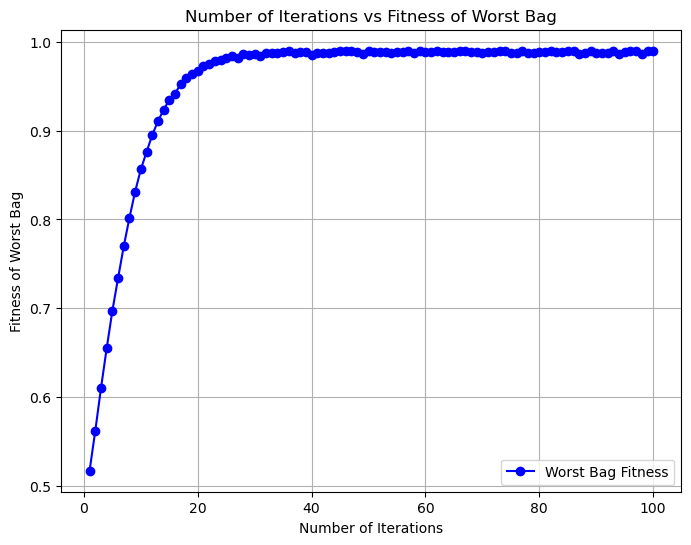

In [40]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



# Assume you have your data (X, y) loaded and ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling on the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Combine X and y into a single dataset
data = np.c_[X_resampled, y_resampled]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}
# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        
        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) % len(data)
        bags[worst_bag_index] = new_bag



        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X_resampled[optimal_bag], y_resampled[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


# SMOTE 5

Iteration 20:
Worst Bag Accuracy: 0.9833333333333333
Worst Bag Diversity (Hamming Distance): 0.05
Worst Bag Fitness: 0.9692950527721329

Iteration 40:
Worst Bag Accuracy: 0.9976689976689976
Worst Bag Diversity (Hamming Distance): 0.02097902097902098
Worst Bag Fitness: 0.9937520758259192

Iteration 60:
Worst Bag Accuracy: 0.967479674796748
Worst Bag Diversity (Hamming Distance): 0.10975609756097561
Worst Bag Fitness: 0.9880927930779676

Iteration 80:
Worst Bag Accuracy: 0.9844559585492227
Worst Bag Diversity (Hamming Distance): 0.04404145077720207
Worst Bag Fitness: 0.9909360604753399

Iteration 100:
Worst Bag Accuracy: 0.9714285714285714
Worst Bag Diversity (Hamming Distance): 0.053061224489795916
Worst Bag Fitness: 0.9888893656396954

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8064516129032258
AUC: 0.6226851851851851
Sensitivity (Recall): 0.8703703703703703
Specificity: 0.375
Precision: 0.9038461538461539
F1 Score: 0.8867924528301887
G-measure: 0.5713045500334204


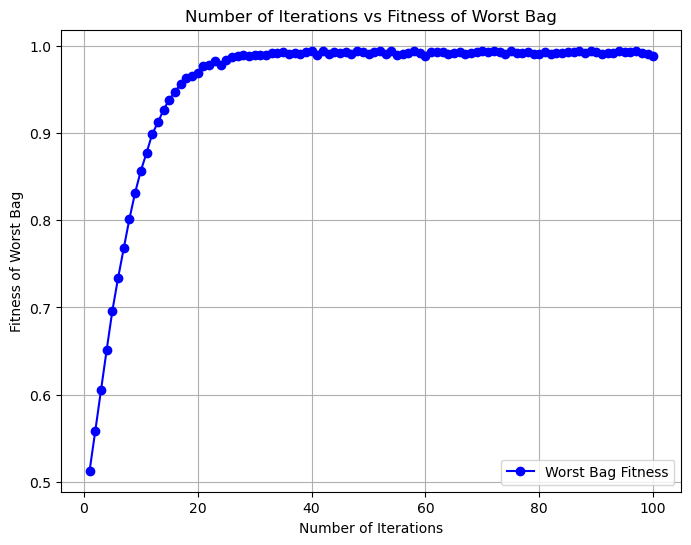

In [58]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



# Assume you have your data (X, y) loaded and ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling on the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Combine X and y into a single dataset
data = np.c_[X_resampled, y_resampled]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}
# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        
        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) % len(data)
        bags[worst_bag_index] = new_bag



        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X_resampled[optimal_bag], y_resampled[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


# ABC 10

Iteration 20:
Worst Bee Accuracy: 0.9773462783171522
Worst Bee Diversity (Hamming Distance): 0.11003236245954692
Worst Bee Fitness: 0.9591896863308674

Iteration 40:
Worst Bee Accuracy: 0.9741100323624595
Worst Bee Diversity (Hamming Distance): 0.0744336569579288
Worst Bee Fitness: 0.9805462766502905

Iteration 60:
Worst Bee Accuracy: 0.9838187702265372
Worst Bee Diversity (Hamming Distance): 0.02912621359223301
Worst Bee Fitness: 0.9802523376364863

Iteration 80:
Worst Bee Accuracy: 0.9773462783171522
Worst Bee Diversity (Hamming Distance): 0.061488673139158574
Worst Bee Fitness: 0.978964283171187

Iteration 100:
Worst Bee Accuracy: 0.9838187702265372
Worst Bee Diversity (Hamming Distance): 0.07119741100323625
Worst Bee Fitness: 0.9809061467250133

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9032258064516129
AUC: 0.7314814814814814
Sensitivity (Recall): 0.9629629629629629
Specificity: 0.5
Precision: 0.9285714285714286
F1 Score: 0.9454545454545454
G-measure: 0.693888666488

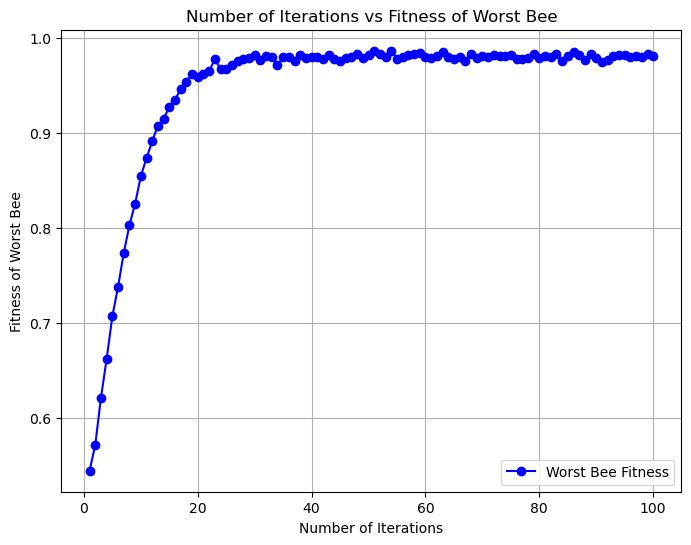

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bees in the colony
num_bees = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Artificial Bee Colony (ABC) algorithm
def abc_optimization(data, classifiers, num_bees):
    # Initialize the position of the bees randomly
    bees_positions = np.random.rand(num_bees, len(data))

    # Tracking lists for worst bee metrics and fitness
    worst_bee_accuracies = []
    worst_bee_diversities = []
    worst_bee_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ABC optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Employed bees phase
        for bee_position in bees_positions:
            # Convert the position to indices for selecting data
            bee_indices = np.round(bee_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[bee_indices, -1])) < 2:
                bee_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_bee, y_train_bee = data[bee_indices, :-1], data[bee_indices, -1]

            ensemble_preds = np.empty((len(X_train_bee), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bee, y_train_bee)
                preds = model.predict(X_train_bee)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bee, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Onlooker bees phase (recruit bees based on information from employed bees)
        # Using a simple roulette wheel selection for simplicity
        probabilities = np.array(accuracies) / np.sum(accuracies)
        onlooker_indices = np.random.choice(num_bees, num_bees, p=probabilities)

        # Scout bees phase (generate new solutions randomly)
        scout_indices = np.where(np.isnan(probabilities))[0]

        # Merge employed bees, onlooker bees, and scout bees
        selected_indices = np.concatenate([onlooker_indices, scout_indices])

        # Rest of the ABC optimization code...
        # Calculate fitness for each bee
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bee with the worst performance
        worst_bee_index = np.argmin(fitness)
        worst_bee_accuracy = accuracies[worst_bee_index]
        worst_bee_diversity = diversities[worst_bee_index]

        # Append worst bee metrics and fitness to tracking lists
        worst_bee_accuracies.append(worst_bee_accuracy)
        worst_bee_diversities.append(worst_bee_diversity)
        worst_bee_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst bee's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update bee positions using the ABC equations
        phi = np.random.uniform(low=-1, high=1, size=(num_bees, len(data)))
        distances = np.random.uniform(low=-1, high=1, size=(num_bees, 1))
        bees_positions = bees_positions + phi * distances

        # Clip the positions to be within the bounds [0, 1]
        bees_positions = np.clip(bees_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bee Accuracy: {worst_bee_accuracy}")
            print(f"Worst Bee Diversity (Hamming Distance): {worst_bee_diversity}")
            print(f"Worst Bee Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return bees_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses

# Perform ABC optimization to get the optimal positions and tracking lists
optimal_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses = abc_optimization(data, classifiers, num_bees)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bee
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_bee_fitnesses_padded = worst_bee_fitnesses[:num_iterations] + [worst_bee_fitnesses[-1]] * (num_iterations - len(worst_bee_fitnesses))
plt.plot(iterations_range, worst_bee_fitnesses_padded, marker='o', color='b', label='Worst Bee Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bee')
plt.title('Number of Iterations vs Fitness of Worst Bee')
plt.legend()
plt.grid(True)
plt.show()


# ABC 5

Iteration 20:
Worst Bee Accuracy: 0.9902912621359223
Worst Bee Diversity (Hamming Distance): 0.02912621359223301
Worst Bee Fitness: 0.9622110505320358

Iteration 40:
Worst Bee Accuracy: 0.9838187702265372
Worst Bee Diversity (Hamming Distance): 0.0744336569579288
Worst Bee Fitness: 0.9802186491704554

Iteration 60:
Worst Bee Accuracy: 0.9838187702265372
Worst Bee Diversity (Hamming Distance): 0.05177993527508091
Worst Bee Fitness: 0.9792814148273685

Iteration 80:
Worst Bee Accuracy: 0.9644012944983819
Worst Bee Diversity (Hamming Distance): 0.14563106796116504
Worst Bee Fitness: 0.9760516672962603

Iteration 100:
Worst Bee Accuracy: 0.9805825242718447
Worst Bee Diversity (Hamming Distance): 0.08414239482200647
Worst Bee Fitness: 0.9766990270601513

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9193548387096774
AUC: 0.7407407407407407
Sensitivity (Recall): 0.9814814814814815
Specificity: 0.5
Precision: 0.9298245614035088
F1 Score: 0.954954954954955
G-measure: 0.7005289007176

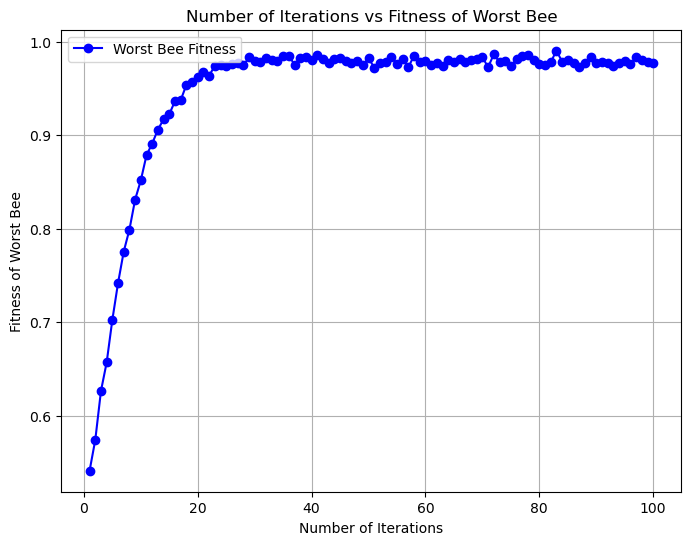

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bees in the colony
num_bees = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Artificial Bee Colony (ABC) algorithm
def abc_optimization(data, classifiers, num_bees):
    # Initialize the position of the bees randomly
    bees_positions = np.random.rand(num_bees, len(data))

    # Tracking lists for worst bee metrics and fitness
    worst_bee_accuracies = []
    worst_bee_diversities = []
    worst_bee_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ABC optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Employed bees phase
        for bee_position in bees_positions:
            # Convert the position to indices for selecting data
            bee_indices = np.round(bee_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[bee_indices, -1])) < 2:
                bee_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_bee, y_train_bee = data[bee_indices, :-1], data[bee_indices, -1]

            ensemble_preds = np.empty((len(X_train_bee), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bee, y_train_bee)
                preds = model.predict(X_train_bee)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bee, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Onlooker bees phase (recruit bees based on information from employed bees)
        # Using a simple roulette wheel selection for simplicity
        probabilities = np.array(accuracies) / np.sum(accuracies)
        onlooker_indices = np.random.choice(num_bees, num_bees, p=probabilities)

        # Scout bees phase (generate new solutions randomly)
        scout_indices = np.where(np.isnan(probabilities))[0]

        # Merge employed bees, onlooker bees, and scout bees
        selected_indices = np.concatenate([onlooker_indices, scout_indices])

        # Rest of the ABC optimization code...
        # Calculate fitness for each bee
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bee with the worst performance
        worst_bee_index = np.argmin(fitness)
        worst_bee_accuracy = accuracies[worst_bee_index]
        worst_bee_diversity = diversities[worst_bee_index]

        # Append worst bee metrics and fitness to tracking lists
        worst_bee_accuracies.append(worst_bee_accuracy)
        worst_bee_diversities.append(worst_bee_diversity)
        worst_bee_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst bee's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update bee positions using the ABC equations
        phi = np.random.uniform(low=-1, high=1, size=(num_bees, len(data)))
        distances = np.random.uniform(low=-1, high=1, size=(num_bees, 1))
        bees_positions = bees_positions + phi * distances

        # Clip the positions to be within the bounds [0, 1]
        bees_positions = np.clip(bees_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bee Accuracy: {worst_bee_accuracy}")
            print(f"Worst Bee Diversity (Hamming Distance): {worst_bee_diversity}")
            print(f"Worst Bee Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return bees_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses

# Perform ABC optimization to get the optimal positions and tracking lists
optimal_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses = abc_optimization(data, classifiers, num_bees)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bee
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_bee_fitnesses_padded = worst_bee_fitnesses[:num_iterations] + [worst_bee_fitnesses[-1]] * (num_iterations - len(worst_bee_fitnesses))
plt.plot(iterations_range, worst_bee_fitnesses_padded, marker='o', color='b', label='Worst Bee Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bee')
plt.title('Number of Iterations vs Fitness of Worst Bee')
plt.legend()
plt.grid(True)
plt.show()


# Ant 5

Iteration 20:
Worst Ant Accuracy: 0.9935275080906149
Worst Ant Diversity (Hamming Distance): 0.022653721682847898
Worst Ant Fitness: 0.9652235016403933

Iteration 40:
Worst Ant Accuracy: 0.9838187702265372
Worst Ant Diversity (Hamming Distance): 0.08737864077669903
Worst Ant Fitness: 0.9821717597698582

Iteration 60:
Worst Ant Accuracy: 0.9644012944983819
Worst Ant Diversity (Hamming Distance): 0.13268608414239483
Worst Ant Fitness: 0.9592173015249418

Iteration 80:
Worst Ant Accuracy: 0.9805825242718447
Worst Ant Diversity (Hamming Distance): 0.10032362459546926
Worst Ant Fitness: 0.9760516638369348

Iteration 100:
Worst Ant Accuracy: 0.9644012944983819
Worst Ant Diversity (Hamming Distance): 0.10679611650485436
Worst Ant Fitness: 0.9734627810963101



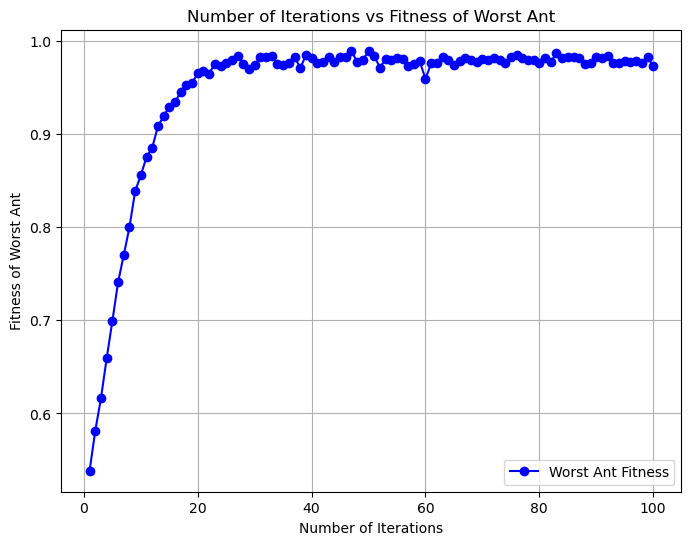

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of ants in the colony
num_ants = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Ant Colony Optimization (ACO) algorithm
def aco_optimization(data, classifiers, num_ants):
    # Initialize the position of the ants randomly
    ants_positions = np.random.rand(num_ants, len(data))

    # Tracking lists for worst ant metrics and fitness
    worst_ant_accuracies = []
    worst_ant_diversities = []
    worst_ant_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ACO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Ants exploration phase
        for ant_position in ants_positions:
            # Convert the position to indices for selecting data
            ant_indices = np.round(ant_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[ant_indices, -1])) < 2:
                ant_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_ant, y_train_ant = data[ant_indices, :-1], data[ant_indices, -1]

            ensemble_preds = np.empty((len(X_train_ant), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_ant, y_train_ant)
                preds = model.predict(X_train_ant)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_ant, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each ant
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the ant with the worst performance
        worst_ant_index = np.argmin(fitness)
        worst_ant_accuracy = accuracies[worst_ant_index]
        worst_ant_diversity = diversities[worst_ant_index]

        # Append worst ant metrics and fitness to tracking lists
        worst_ant_accuracies.append(worst_ant_accuracy)
        worst_ant_diversities.append(worst_ant_diversity)
        worst_ant_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst ant's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update ant positions using the ACO equations
        phi = np.random.uniform(low=-1, high=1, size=(num_ants, len(data)))
        distances = np.random.uniform(low=-1, high=1, size=(num_ants, 1))
        ants_positions = ants_positions + phi * distances

        # Clip the positions to be within the bounds [0, 1]
        ants_positions = np.clip(ants_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Ant Accuracy: {worst_ant_accuracy}")
            print(f"Worst Ant Diversity (Hamming Distance): {worst_ant_diversity}")
            print(f"Worst Ant Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return ants_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses

# Perform ACO optimization to get the optimal positions and tracking lists
optimal_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses = aco_optimization(data, classifiers, num_ants)

# Use the optimized ensemble to make predictions on the testing data
# ...

# Line plot for number of iterations vs fitness of worst ant
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_ant_fitnesses_padded = worst_ant_fitnesses[:num_iterations] + [worst_ant_fitnesses[-1]] * (num_iterations - len(worst_ant_fitnesses))
plt.plot(iterations_range, worst_ant_fitnesses_padded, marker='o', color='b', label='Worst Ant Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Ant')
plt.title('Number of Iterations vs Fitness of Worst Ant')
plt.legend()
plt.grid(True)
plt.show()


# ACO 10

Iteration 20:
Worst Ant Accuracy: 0.9935275080906149
Worst Ant Diversity (Hamming Distance): 0.04854368932038835
Worst Ant Fitness: 0.9612331831566798

Iteration 40:
Worst Ant Accuracy: 0.9935275080906149
Worst Ant Diversity (Hamming Distance): 0.09385113268608414
Worst Ant Fitness: 0.9834592853854204

Iteration 60:
Worst Ant Accuracy: 0.9967637540453075
Worst Ant Diversity (Hamming Distance): 0.04854368932038835
Worst Ant Fitness: 0.9808995798241804

Iteration 80:
Worst Ant Accuracy: 0.9741100323624595
Worst Ant Diversity (Hamming Distance): 0.07766990291262135
Worst Ant Fitness: 0.9834950275921304

Iteration 100:
Worst Ant Accuracy: 0.9579288025889967
Worst Ant Diversity (Hamming Distance): 0.1423948220064725
Worst Ant Fitness: 0.9822006451183258



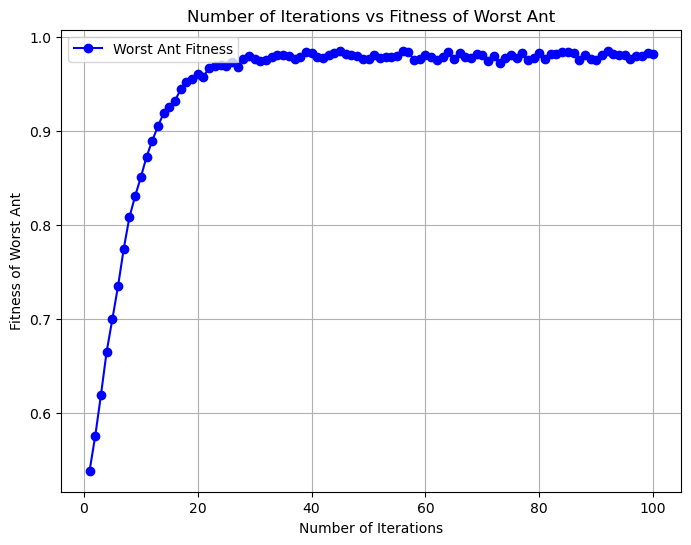

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of ants in the colony
num_ants = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Ant Colony Optimization (ACO) algorithm
def aco_optimization(data, classifiers, num_ants):
    # Initialize the position of the ants randomly
    ants_positions = np.random.rand(num_ants, len(data))

    # Tracking lists for worst ant metrics and fitness
    worst_ant_accuracies = []
    worst_ant_diversities = []
    worst_ant_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ACO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Ants exploration phase
        for ant_position in ants_positions:
            # Convert the position to indices for selecting data
            ant_indices = np.round(ant_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[ant_indices, -1])) < 2:
                ant_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_ant, y_train_ant = data[ant_indices, :-1], data[ant_indices, -1]

            ensemble_preds = np.empty((len(X_train_ant), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_ant, y_train_ant)
                preds = model.predict(X_train_ant)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_ant, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each ant
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the ant with the worst performance
        worst_ant_index = np.argmin(fitness)
        worst_ant_accuracy = accuracies[worst_ant_index]
        worst_ant_diversity = diversities[worst_ant_index]

        # Append worst ant metrics and fitness to tracking lists
        worst_ant_accuracies.append(worst_ant_accuracy)
        worst_ant_diversities.append(worst_ant_diversity)
        worst_ant_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst ant's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update ant positions using the ACO equations
        phi = np.random.uniform(low=-1, high=1, size=(num_ants, len(data)))
        distances = np.random.uniform(low=-1, high=1, size=(num_ants, 1))
        ants_positions = ants_positions + phi * distances

        # Clip the positions to be within the bounds [0, 1]
        ants_positions = np.clip(ants_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Ant Accuracy: {worst_ant_accuracy}")
            print(f"Worst Ant Diversity (Hamming Distance): {worst_ant_diversity}")
            print(f"Worst Ant Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return ants_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses

# Perform ACO optimization to get the optimal positions and tracking lists
optimal_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses = aco_optimization(data, classifiers, num_ants)

# Use the optimized ensemble to make predictions on the testing data
# ...

# Line plot for number of iterations vs fitness of worst ant
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_ant_fitnesses_padded = worst_ant_fitnesses[:num_iterations] + [worst_ant_fitnesses[-1]] * (num_iterations - len(worst_ant_fitnesses))
plt.plot(iterations_range, worst_ant_fitnesses_padded, marker='o', color='b', label='Worst Ant Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Ant')
plt.title('Number of Iterations vs Fitness of Worst Ant')
plt.legend()
plt.grid(True)
plt.show()


# Firefly 5

Iteration 20:
Worst Firefly Accuracy: 0.9741100323624595
Worst Firefly Diversity: 0.13592233009708737
Worst Firefly Fitness: 0.9563603036125167

Iteration 40:
Worst Firefly Accuracy: 0.9870550161812298
Worst Firefly Diversity: 0.12297734627831715
Worst Firefly Fitness: 0.9711915078276815

Iteration 60:
Worst Firefly Accuracy: 0.9870550161812298
Worst Firefly Diversity: 0.11326860841423948
Worst Firefly Fitness: 0.9766929969984749

Iteration 80:
Worst Firefly Accuracy: 0.9805825242718447
Worst Firefly Diversity: 0.12944983818770225
Worst Firefly Fitness: 0.9799351653106003

Iteration 100:
Worst Firefly Accuracy: 0.9773462783171522
Worst Firefly Diversity: 0.12944983818770225
Worst Firefly Fitness: 0.9799352730987062

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9032258064516129
AUC: 0.625
Sensitivity (Recall): 1.0
Specificity: 0.25
Precision: 0.9
F1 Score: 0.9473684210526316
G-measure: 0.5


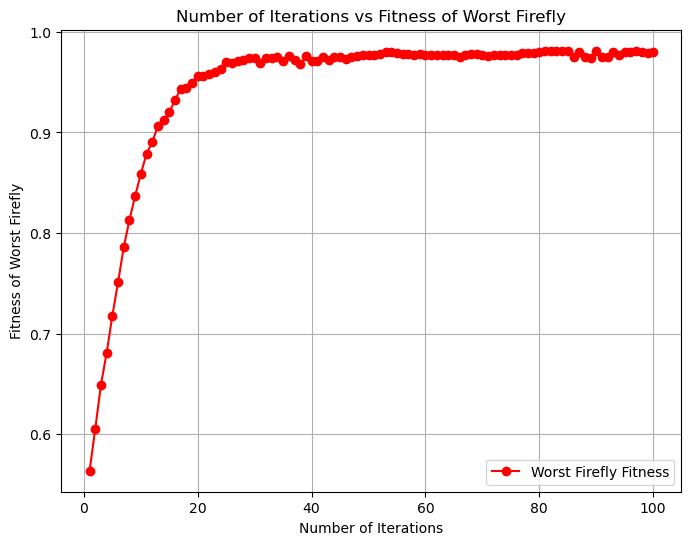

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of fireflies in the population
num_fireflies = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Firefly Optimization (FA) algorithm
def firefly_optimization(data, classifiers, num_fireflies):
    # Initialize the position of the fireflies randomly
    fireflies_positions = np.random.rand(num_fireflies, len(data))

    # Tracking lists for worst firefly metrics and fitness
    worst_firefly_accuracies = []
    worst_firefly_diversities = []
    worst_firefly_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform FA optimization
    num_iterations = 100
    beta_0 = 1.0  # Initial attractiveness
    alpha = 0.2    # Light absorption coefficient

    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Move fireflies towards better solutions
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if i != j:  # Exclude self-comparison
                    # Evaluate fitness of fireflies i and j
                    fitness_i = evaluate_fitness(fireflies_positions[i], data, classifiers)
                    fitness_j = evaluate_fitness(fireflies_positions[j], data, classifiers)

                    # Update position of firefly i based on attractiveness and distance
                    if fitness_i > fitness_j:
                        distance = np.linalg.norm(fireflies_positions[i] - fireflies_positions[j])
                        attractiveness = beta_0 * np.exp(-alpha * distance**2)
                        fireflies_positions[i] += attractiveness * (fireflies_positions[j] - fireflies_positions[i])

            # Ensure positions are within the bounds [0, 1]
            fireflies_positions[i] = np.clip(fireflies_positions[i], 0, 1)

            # Evaluate fitness of the updated firefly
            fitness = evaluate_fitness(fireflies_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the FA optimization code...

        # Calculate fitness for each firefly
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the firefly with the worst performance
        worst_firefly_index = np.argmin(fitness)
        worst_firefly_accuracy = accuracies[worst_firefly_index]
        worst_firefly_diversity = diversities[worst_firefly_index]

        # Append worst firefly metrics and fitness to tracking lists
        worst_firefly_accuracies.append(worst_firefly_accuracy)
        worst_firefly_diversities.append(worst_firefly_diversity)
        worst_firefly_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst firefly's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Firefly Accuracy: {worst_firefly_accuracy}")
            print(f"Worst Firefly Diversity: {worst_firefly_diversity}")
            print(f"Worst Firefly Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return fireflies_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses

# Evaluate the fitness of a firefly
def evaluate_fitness(position, data, classifiers):
    # Convert the position to indices for selecting data
    indices = np.round(position * (len(data) - 1)).astype(int)

    # Ensure that the selected indices cover at least two classes
    while len(np.unique(data[indices, -1])) < 2:
        indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

    X_train, y_train = data[indices, :-1], data[indices, -1]

    ensemble_preds = np.empty((len(X_train), len(classifiers)))

    # Train and predict with each classifier using 5-fold cross-validation
    for idx, (name, clf) in enumerate(classifiers.items()):
        model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
        model.fit(X_train, y_train)
        preds = model.predict(X_train)
        ensemble_preds[:, idx] = preds

    # Calculate diversity as Hamming distance between classifiers' predictions
    diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

    # Calculate accuracy
    ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
    accuracy = accuracy_score(y_train, ensemble_preds_majority)

    return accuracy, diversity

# Perform FA optimization to get the optimal positions and tracking lists
optimal_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses = firefly_optimization(data, classifiers, num_fireflies)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst firefly
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_firefly_fitnesses_padded = worst_firefly_fitnesses[:num_iterations] + [worst_firefly_fitnesses[-1]] * (num_iterations - len(worst_firefly_fitnesses))
plt.plot(iterations_range, worst_firefly_fitnesses_padded, marker='o', color='r', label='Worst Firefly Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Firefly')
plt.title('Number of Iterations vs Fitness of Worst Firefly')
plt.legend()
plt.grid(True)
plt.show()


# firefly 10

Iteration 20:
Worst Firefly Accuracy: 0.9838187702265372
Worst Firefly Diversity: 0.14563106796116504
Worst Firefly Fitness: 0.9586727113995747

Iteration 40:
Worst Firefly Accuracy: 0.970873786407767
Worst Firefly Diversity: 0.18770226537216828
Worst Firefly Fitness: 0.9731395825403013

Iteration 60:
Worst Firefly Accuracy: 0.9676375404530745
Worst Firefly Diversity: 0.20064724919093851
Worst Firefly Fitness: 0.9731332758508576

Iteration 80:
Worst Firefly Accuracy: 0.970873786407767
Worst Firefly Diversity: 0.13268608414239483
Worst Firefly Fitness: 0.9776697954625949

Iteration 100:
Worst Firefly Accuracy: 0.9805825242718447
Worst Firefly Diversity: 0.11650485436893204
Worst Firefly Fitness: 0.976375402573703

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9032258064516129
AUC: 0.625
Sensitivity (Recall): 1.0
Specificity: 0.25
Precision: 0.9
F1 Score: 0.9473684210526316
G-measure: 0.5


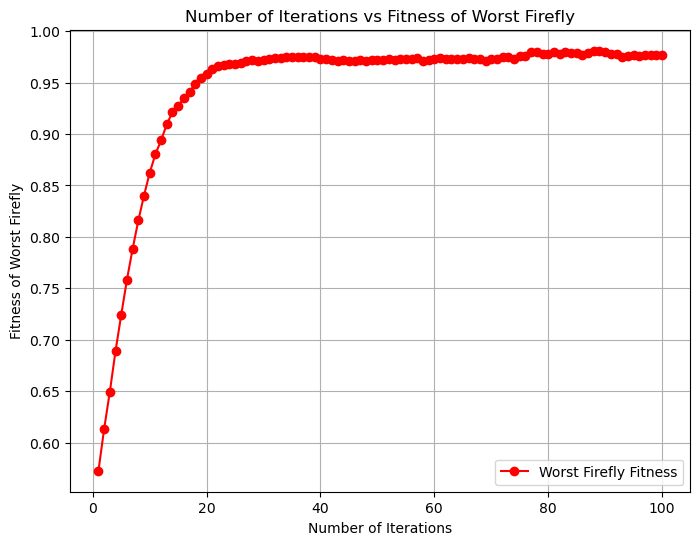

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of fireflies in the population
num_fireflies = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Firefly Optimization (FA) algorithm
def firefly_optimization(data, classifiers, num_fireflies):
    # Initialize the position of the fireflies randomly
    fireflies_positions = np.random.rand(num_fireflies, len(data))

    # Tracking lists for worst firefly metrics and fitness
    worst_firefly_accuracies = []
    worst_firefly_diversities = []
    worst_firefly_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform FA optimization
    num_iterations = 100
    beta_0 = 1.0  # Initial attractiveness
    alpha = 0.2    # Light absorption coefficient

    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Move fireflies towards better solutions
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if i != j:  # Exclude self-comparison
                    # Evaluate fitness of fireflies i and j
                    fitness_i = evaluate_fitness(fireflies_positions[i], data, classifiers)
                    fitness_j = evaluate_fitness(fireflies_positions[j], data, classifiers)

                    # Update position of firefly i based on attractiveness and distance
                    if fitness_i > fitness_j:
                        distance = np.linalg.norm(fireflies_positions[i] - fireflies_positions[j])
                        attractiveness = beta_0 * np.exp(-alpha * distance**2)
                        fireflies_positions[i] += attractiveness * (fireflies_positions[j] - fireflies_positions[i])

            # Ensure positions are within the bounds [0, 1]
            fireflies_positions[i] = np.clip(fireflies_positions[i], 0, 1)

            # Evaluate fitness of the updated firefly
            fitness = evaluate_fitness(fireflies_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the FA optimization code...

        # Calculate fitness for each firefly
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the firefly with the worst performance
        worst_firefly_index = np.argmin(fitness)
        worst_firefly_accuracy = accuracies[worst_firefly_index]
        worst_firefly_diversity = diversities[worst_firefly_index]

        # Append worst firefly metrics and fitness to tracking lists
        worst_firefly_accuracies.append(worst_firefly_accuracy)
        worst_firefly_diversities.append(worst_firefly_diversity)
        worst_firefly_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst firefly's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Firefly Accuracy: {worst_firefly_accuracy}")
            print(f"Worst Firefly Diversity: {worst_firefly_diversity}")
            print(f"Worst Firefly Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return fireflies_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses

# Evaluate the fitness of a firefly
def evaluate_fitness(position, data, classifiers):
    # Convert the position to indices for selecting data
    indices = np.round(position * (len(data) - 1)).astype(int)

    # Ensure that the selected indices cover at least two classes
    while len(np.unique(data[indices, -1])) < 2:
        indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

    X_train, y_train = data[indices, :-1], data[indices, -1]

    ensemble_preds = np.empty((len(X_train), len(classifiers)))

    # Train and predict with each classifier using 5-fold cross-validation
    for idx, (name, clf) in enumerate(classifiers.items()):
        model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
        model.fit(X_train, y_train)
        preds = model.predict(X_train)
        ensemble_preds[:, idx] = preds

    # Calculate diversity as Hamming distance between classifiers' predictions
    diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

    # Calculate accuracy
    ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
    accuracy = accuracy_score(y_train, ensemble_preds_majority)

    return accuracy, diversity

# Perform FA optimization to get the optimal positions and tracking lists
optimal_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses = firefly_optimization(data, classifiers, num_fireflies)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst firefly
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_firefly_fitnesses_padded = worst_firefly_fitnesses[:num_iterations] + [worst_firefly_fitnesses[-1]] * (num_iterations - len(worst_firefly_fitnesses))
plt.plot(iterations_range, worst_firefly_fitnesses_padded, marker='o', color='r', label='Worst Firefly Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Firefly')
plt.title('Number of Iterations vs Fitness of Worst Firefly')
plt.legend()
plt.grid(True)
plt.show()


# PSO 10

Iteration 20:
Best Particle Accuracy: 0.9449838187702265
Best Particle Diversity: 0.11650485436893204
Best Particle Fitness: 0.9262193351963254

Iteration 40:
Best Particle Accuracy: 0.9288025889967637
Best Particle Diversity: 0.23300970873786409
Best Particle Fitness: 0.9385193692179165

Iteration 60:
Best Particle Accuracy: 0.9158576051779935
Best Particle Diversity: 0.11650485436893204
Best Particle Fitness: 0.921029767337432

Iteration 80:
Best Particle Accuracy: 0.9158576051779935
Best Particle Diversity: 0.11650485436893204
Best Particle Fitness: 0.9145630033116583

Iteration 100:
Best Particle Accuracy: 0.912621359223301
Best Particle Diversity: 0.12297734627831715
Best Particle Fitness: 0.9129449819562647

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9193548387096774
AUC: 0.7407407407407407
Sensitivity (Recall): 0.9814814814814815
Specificity: 0.5
Precision: 0.9298245614035088
F1 Score: 0.954954954954955
G-measure: 0.700528900717694


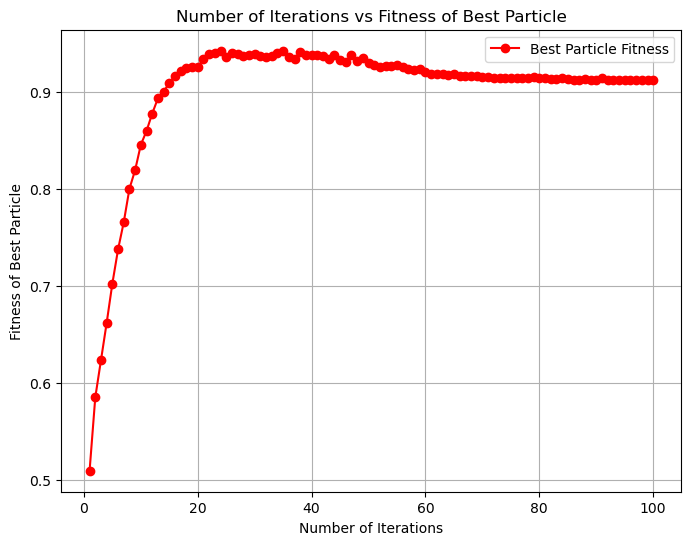

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of particles in the population
num_particles = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
    'model': LogisticRegression(),
    'param_grid': {'C': [0.1], 'penalty': ['l2']}
}

    }


# Define the Particle Swarm Optimization (PSO) algorithm
def particle_swarm_optimization(data, classifiers, num_particles):
    # Initialize particle positions and velocities randomly
    particle_positions = np.random.rand(num_particles, len(data))
    particle_velocities = np.random.rand(num_particles, len(data))

    # Tracking lists for best particle metrics and fitness
    best_particle_accuracies = []
    best_particle_diversities = []
    best_particle_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform PSO optimization
    num_iterations = 100
    inertia_weight = 0.5
    personal_weight = 1.5
    social_weight = 1.5

    # Initialize personal best positions and fitness for each particle
    personal_best_positions = np.copy(particle_positions)
    personal_best_fitnesses = [evaluate_fitness(pos, data, classifiers) for pos in particle_positions]

    # Initialize global best position and fitness
    if personal_best_fitnesses:
        global_best_index = np.argmin(personal_best_fitnesses)
        global_best_position = np.copy(personal_best_positions[global_best_index % num_particles])
        global_best_fitness = personal_best_fitnesses[global_best_index]
    else:
       # Set initial values if the list is empty
        global_best_index = 0
        global_best_position = np.copy(personal_best_positions[global_best_index % num_particles])
        global_best_fitness = float('inf')


    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Update particle positions and velocities
        for i in range(num_particles):
            # Evaluate fitness of current particle
            fitness = evaluate_fitness(particle_positions[i], data, classifiers)

            # Update personal best position and fitness
            if fitness < personal_best_fitnesses[i]:
                personal_best_positions[i] = np.copy(particle_positions[i])
                personal_best_fitnesses[i] = fitness

            # Update global best position and fitness
            if fitness < global_best_fitness:
                global_best_position = np.copy(particle_positions[i])
                global_best_fitness = fitness

            # Update particle velocity and position
            particle_velocities[i] = (
                inertia_weight * particle_velocities[i] +
                personal_weight * np.random.rand() * (personal_best_positions[i] - particle_positions[i]) +
                social_weight * np.random.rand() * (global_best_position - particle_positions[i])
            )
            particle_positions[i] += particle_velocities[i]

            # Ensure positions are within the bounds [0, 1]
            particle_positions[i] = np.clip(particle_positions[i], 0, 1)

            # Evaluate fitness of the updated particle
            fitness = evaluate_fitness(particle_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the PSO optimization code...

        # Calculate fitness for each particle
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the best particle
        best_particle_index = np.argmin(fitness)
        best_particle_accuracy = accuracies[best_particle_index]
        best_particle_diversity = diversities[best_particle_index]

        # Append best particle metrics and fitness to tracking lists
        best_particle_accuracies.append(best_particle_accuracy)
        best_particle_diversities.append(best_particle_diversity)
        best_particle_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on best particle's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Particle Accuracy: {best_particle_accuracy}")
            print(f"Best Particle Diversity: {best_particle_diversity}")
            print(f"Best Particle Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return particle_positions, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses

# Perform PSO optimization to get the optimal positions and tracking lists
optimal_positions, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses = particle_swarm_optimization(data, classifiers, num_particles)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best particle
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
best_particle_fitnesses_padded = best_particle_fitnesses[:num_iterations] + [best_particle_fitnesses[-1]] * (num_iterations - len(best_particle_fitnesses))
plt.plot(iterations_range, best_particle_fitnesses_padded, marker='o', color='r', label='Best Particle Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Particle')
plt.title('Number of Iterations vs Fitness of Best Particle')
plt.legend()
plt.grid(True)
plt.show()


# pso 5

Iteration 20:
Best Particle Accuracy: 0.941747572815534
Best Particle Diversity: 0.13592233009708737
Best Particle Fitness: 0.9392241067344049

Iteration 40:
Best Particle Accuracy: 0.9255663430420712
Best Particle Diversity: 0.13268608414239483
Best Particle Fitness: 0.9362462495315041

Iteration 60:
Best Particle Accuracy: 0.9255663430420712
Best Particle Diversity: 0.1262135922330097
Best Particle Fitness: 0.9326802667808138

Iteration 80:
Best Particle Accuracy: 0.9223300970873787
Best Particle Diversity: 0.13592233009708737
Best Particle Fitness: 0.9242717424835296

Iteration 100:
Best Particle Accuracy: 0.9223300970873787
Best Particle Diversity: 0.13592233009708737
Best Particle Fitness: 0.922330095234784

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9354838709677419
AUC: 0.75
Sensitivity (Recall): 1.0
Specificity: 0.5
Precision: 0.9310344827586207
F1 Score: 0.9642857142857143
G-measure: 0.7071067811865476


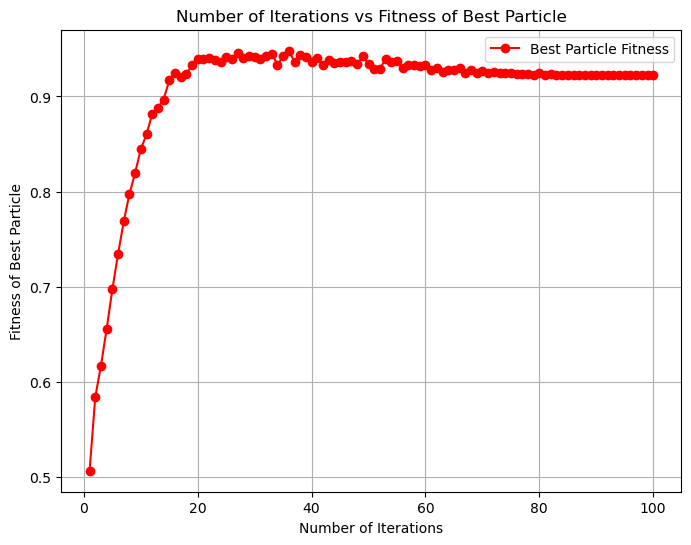

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of particles in the population
num_particles = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
    'model': LogisticRegression(),
    'param_grid': {'C': [0.1], 'penalty': ['l2']}
}

    }


# Define the Particle Swarm Optimization (PSO) algorithm
def particle_swarm_optimization(data, classifiers, num_particles):
    # Initialize particle positions and velocities randomly
    particle_positions = np.random.rand(num_particles, len(data))
    particle_velocities = np.random.rand(num_particles, len(data))

    # Tracking lists for best particle metrics and fitness
    best_particle_accuracies = []
    best_particle_diversities = []
    best_particle_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform PSO optimization
    num_iterations = 100
    inertia_weight = 0.5
    personal_weight = 1.5
    social_weight = 1.5

    # Initialize personal best positions and fitness for each particle
    personal_best_positions = np.copy(particle_positions)
    personal_best_fitnesses = [evaluate_fitness(pos, data, classifiers) for pos in particle_positions]

    # Initialize global best position and fitness
    if personal_best_fitnesses:
        global_best_index = np.argmin(personal_best_fitnesses)
        global_best_position = np.copy(personal_best_positions[global_best_index % num_particles])
        global_best_fitness = personal_best_fitnesses[global_best_index]
    else:
       # Set initial values if the list is empty
        global_best_index = 0
        global_best_position = np.copy(personal_best_positions[global_best_index % num_particles])
        global_best_fitness = float('inf')


    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Update particle positions and velocities
        for i in range(num_particles):
            # Evaluate fitness of current particle
            fitness = evaluate_fitness(particle_positions[i], data, classifiers)

            # Update personal best position and fitness
            if fitness < personal_best_fitnesses[i]:
                personal_best_positions[i] = np.copy(particle_positions[i])
                personal_best_fitnesses[i] = fitness

            # Update global best position and fitness
            if fitness < global_best_fitness:
                global_best_position = np.copy(particle_positions[i])
                global_best_fitness = fitness

            # Update particle velocity and position
            particle_velocities[i] = (
                inertia_weight * particle_velocities[i] +
                personal_weight * np.random.rand() * (personal_best_positions[i] - particle_positions[i]) +
                social_weight * np.random.rand() * (global_best_position - particle_positions[i])
            )
            particle_positions[i] += particle_velocities[i]

            # Ensure positions are within the bounds [0, 1]
            particle_positions[i] = np.clip(particle_positions[i], 0, 1)

            # Evaluate fitness of the updated particle
            fitness = evaluate_fitness(particle_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the PSO optimization code...

        # Calculate fitness for each particle
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the best particle
        best_particle_index = np.argmin(fitness)
        best_particle_accuracy = accuracies[best_particle_index]
        best_particle_diversity = diversities[best_particle_index]

        # Append best particle metrics and fitness to tracking lists
        best_particle_accuracies.append(best_particle_accuracy)
        best_particle_diversities.append(best_particle_diversity)
        best_particle_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on best particle's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Particle Accuracy: {best_particle_accuracy}")
            print(f"Best Particle Diversity: {best_particle_diversity}")
            print(f"Best Particle Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return particle_positions, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses

# Perform PSO optimization to get the optimal positions and tracking lists
optimal_positions, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses = particle_swarm_optimization(data, classifiers, num_particles)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best particle
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
best_particle_fitnesses_padded = best_particle_fitnesses[:num_iterations] + [best_particle_fitnesses[-1]] * (num_iterations - len(best_particle_fitnesses))
plt.plot(iterations_range, best_particle_fitnesses_padded, marker='o', color='r', label='Best Particle Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Particle')
plt.title('Number of Iterations vs Fitness of Best Particle')
plt.legend()
plt.grid(True)
plt.show()


# with 10 bags 

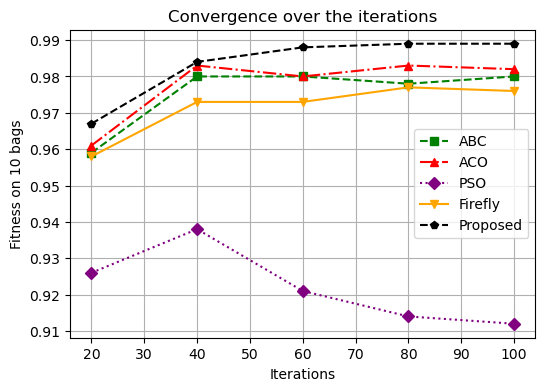

In [59]:
import matplotlib.pyplot as plt

# Data
iterations = [20, 40, 60, 80, 100]


abc_values = [0.959, 0.980, 0.980, 0.978, 0.980]
aco_values = [0.961, 0.983, 0.980, 0.983, 0.982]
pso_values = [0.926, 0.938, 0.921, 0.914, 0.912]
firefly_values = [0.958, 0.973, 0.973, 0.977, 0.976]
proposed_values = [0.967, 0.984, 0.988, 0.989, 0.989]

# Plotting with different line types and visual effects
plt.figure(figsize=(6, 4))


plt.plot(iterations, abc_values, marker='s', linestyle='--', color='g', label='ABC')
plt.plot(iterations, aco_values, marker='^', linestyle='-.', color='r', label='ACO')
plt.plot(iterations, pso_values, marker='D', linestyle=':', color='purple', label='PSO')
plt.plot(iterations, firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
plt.plot(iterations, proposed_values, marker='p', linestyle='--', color='black', label='Proposed')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Fitness on 10 bags')
plt.title('Convergence over the iterations')
plt.legend()
plt.grid(True)
plt.show()


# with 5 bags 

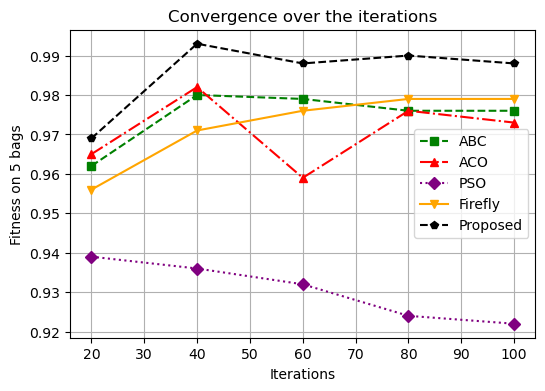

In [60]:
import matplotlib.pyplot as plt

# Data
iterations = [20, 40, 60, 80, 100]


abc_values = [0.962, 0.980, 0.979, 0.976, 0.976]
aco_values = [0.965, 0.982, 0.959, 0.976, 0.973]
pso_values = [0.939, 0.936, 0.932, 0.924, 0.922]
firefly_values = [0.956, 0.971, 0.976, 0.979, 0.979]
proposed_values = [0.969, 0.993, 0.988, 0.990, 0.988]

# Plotting with different line types and visual effects
plt.figure(figsize=(6, 4))


plt.plot(iterations, abc_values, marker='s', linestyle='--', color='g', label='ABC')
plt.plot(iterations, aco_values, marker='^', linestyle='-.', color='r', label='ACO')
plt.plot(iterations, pso_values, marker='D', linestyle=':', color='purple', label='PSO')
plt.plot(iterations, firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
plt.plot(iterations, proposed_values, marker='p', linestyle='--', color='black', label='Proposed')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Fitness on 5 bags')
plt.title('Convergence over the iterations')
plt.legend()
plt.grid(True)
plt.show()


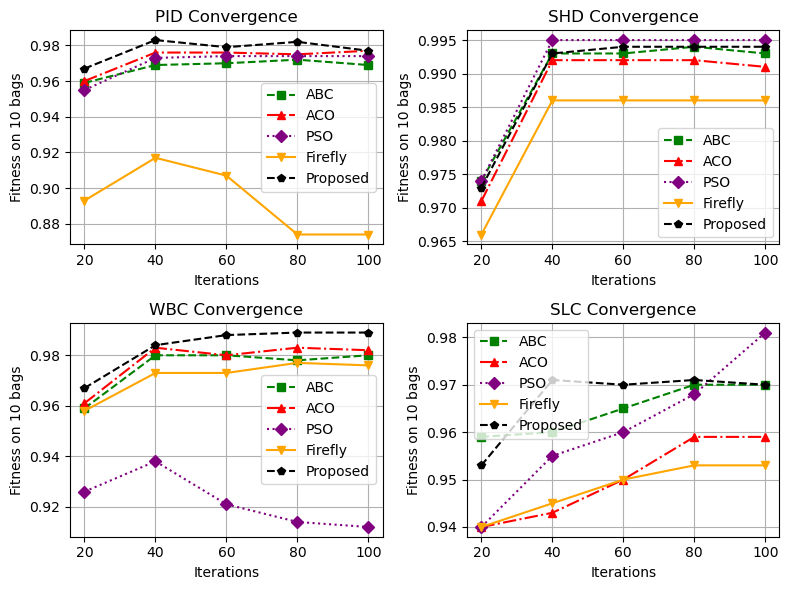

In [6]:
import matplotlib.pyplot as plt

# Data
iterations = [20, 40, 60, 80, 100]

# Data for PID
pid_abc_values = [0.959, 0.969, 0.970, 0.972, 0.969]
pid_aco_values = [0.960, 0.976, 0.976, 0.975, 0.977]
pid_pso_values = [0.955, 0.973, 0.974, 0.974, 0.974]
pid_firefly_values = [0.893, 0.917, 0.907, 0.874, 0.874]
pid_proposed_values = [0.967, 0.983, 0.979, 0.982, 0.977]

# Data for SHD
shd_abc_values = [0.974, 0.993, 0.993, 0.994, 0.993]
shd_aco_values = [0.971, 0.992, 0.992, 0.992, 0.991]
shd_pso_values = [0.974, 0.995, 0.995, 0.995, 0.995]
shd_firefly_values = [0.966, 0.986, 0.986, 0.986, 0.986]
shd_proposed_values = [0.973, 0.993, 0.994, 0.994, 0.994]

# Data for WBC
wbc_abc_values = [0.959, 0.980, 0.980, 0.978, 0.980]
wbc_aco_values = [0.961, 0.983, 0.980, 0.983, 0.982]
wbc_pso_values = [0.926, 0.938, 0.921, 0.914, 0.912]
wbc_firefly_values = [0.958, 0.973, 0.973, 0.977, 0.976]
wbc_proposed_values = [0.967, 0.984, 0.988, 0.989, 0.989]

# Data for SLC
slc_gwo_values = [0.852, 0.869, 0.860, 0.865, 0.865]
slc_abc_values = [0.959, 0.960, 0.965, 0.970, 0.970]
slc_aco_values = [0.940, 0.943, 0.950, 0.959, 0.959]
slc_pso_values = [0.940, 0.955, 0.960, 0.968, 0.981]
slc_firefly_values = [0.940, 0.945, 0.950, 0.953, 0.953]
slc_proposed_values = [0.953, 0.971, 0.970, 0.971, 0.970]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plotting for PID
axs[0, 0].plot(iterations, pid_abc_values, marker='s', linestyle='--', color='g', label='ABC')
axs[0, 0].plot(iterations, pid_aco_values, marker='^', linestyle='-.', color='r', label='ACO')
axs[0, 0].plot(iterations, pid_pso_values, marker='D', linestyle=':', color='purple', label='PSO')
axs[0, 0].plot(iterations, pid_firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
axs[0, 0].plot(iterations, pid_proposed_values, marker='p', linestyle='--', color='black', label='Proposed')
axs[0, 0].set_title('PID Convergence')

# Plotting for SHD
axs[0, 1].plot(iterations, shd_abc_values, marker='s', linestyle='--', color='g', label='ABC')
axs[0, 1].plot(iterations, shd_aco_values, marker='^', linestyle='-.', color='r', label='ACO')
axs[0, 1].plot(iterations, shd_pso_values, marker='D', linestyle=':', color='purple', label='PSO')
axs[0, 1].plot(iterations, shd_firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
axs[0, 1].plot(iterations, shd_proposed_values, marker='p', linestyle='--', color='black', label='Proposed')
axs[0, 1].set_title('SHD Convergence')

# Plotting for WBC
axs[1, 0].plot(iterations, wbc_abc_values, marker='s', linestyle='--', color='g', label='ABC')
axs[1, 0].plot(iterations, wbc_aco_values, marker='^', linestyle='-.', color='r', label='ACO')
axs[1, 0].plot(iterations, wbc_pso_values, marker='D', linestyle=':', color='purple', label='PSO')
axs[1, 0].plot(iterations, wbc_firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
axs[1, 0].plot(iterations, wbc_proposed_values, marker='p', linestyle='--', color='black', label='Proposed')
axs[1, 0].set_title('WBC Convergence')

# Plotting for SLC
axs[1, 1].plot(iterations, slc_abc_values, marker='s', linestyle='--', color='g', label='ABC')
axs[1, 1].plot(iterations, slc_aco_values, marker='^', linestyle='-.', color='r', label='ACO')
axs[1, 1].plot(iterations, slc_pso_values, marker='D', linestyle=':', color='purple', label='PSO')
axs[1, 1].plot(iterations, slc_firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
axs[1, 1].plot(iterations, slc_proposed_values, marker='p', linestyle='--', color='black', label='Proposed')
axs[1, 1].set_title('SLC Convergence')

# Adding labels and title to the entire figure
for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Fitness on 10 bags')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# Convergence on PID,SHD,WBC and SLC of various optimization algorithms with 5 bags

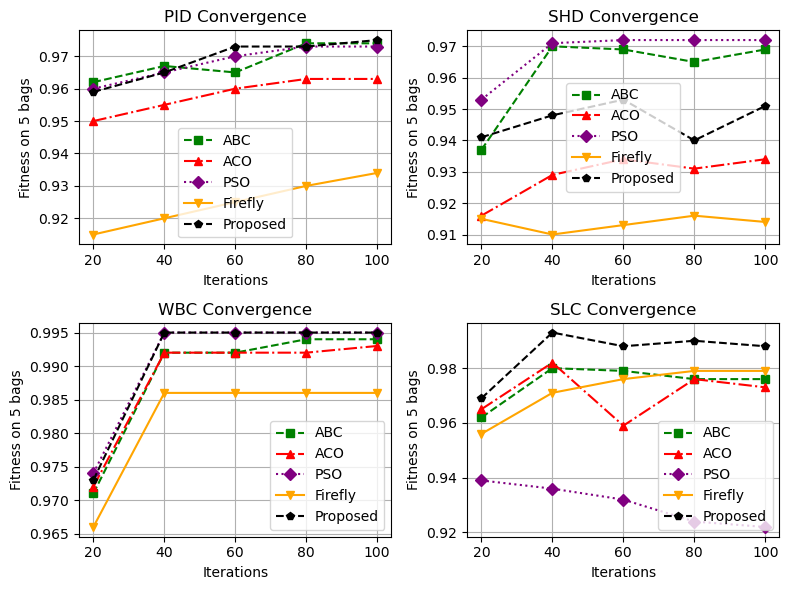

In [68]:
# import matplotlib.pyplot as plt

# Data
iterations = [20, 40, 60, 80, 100]

# Data for PID
pid_abc_values = [0.962, 0.967, 0.965, 0.974, 0.974]
pid_aco_values = [0.950, 0.955, 0.960, 0.963, 0.963]
pid_pso_values = [0.960, 0.965, 0.970, 0.973, 0.973]
pid_firefly_values = [0.915, 0.920, 0.925, 0.930, 0.934]
pid_proposed_values = [0.959, 0.965, 0.973, 0.973, 0.975]

# Data for SHD
shd_abc_values = [0.937, 0.970, 0.969, 0.965, 0.969]
shd_aco_values = [0.916, 0.929, 0.934, 0.931, 0.934]
shd_pso_values = [0.953, 0.971, 0.972, 0.972, 0.972]
shd_firefly_values = [0.915, 0.910, 0.913, 0.916, 0.914]
shd_proposed_values = [0.941, 0.948, 0.953, 0.940, 0.951]

# Data for WBC
wbc_abc_values = [0.971, 0.992, 0.992, 0.994, 0.994]
wbc_aco_values = [0.972, 0.992, 0.992, 0.992, 0.993]
wbc_pso_values = [0.974, 0.995, 0.995, 0.995, 0.995]
wbc_firefly_values = [0.966, 0.986, 0.986, 0.986, 0.986]
wbc_proposed_values = [0.973, 0.995, 0.995, 0.995, 0.995]


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plotting for PID
axs[0, 0].plot(iterations, pid_abc_values, marker='s', linestyle='--', color='g', label='ABC')
axs[0, 0].plot(iterations, pid_aco_values, marker='^', linestyle='-.', color='r', label='ACO')
axs[0, 0].plot(iterations, pid_pso_values, marker='D', linestyle=':', color='purple', label='PSO')
axs[0, 0].plot(iterations, pid_firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
axs[0, 0].plot(iterations, pid_proposed_values, marker='p', linestyle='--', color='black', label='Proposed')
axs[0, 0].set_title('PID Convergence')

# Plotting for SHD
axs[0, 1].plot(iterations, shd_abc_values, marker='s', linestyle='--', color='g', label='ABC')
axs[0, 1].plot(iterations, shd_aco_values, marker='^', linestyle='-.', color='r', label='ACO')
axs[0, 1].plot(iterations, shd_pso_values, marker='D', linestyle=':', color='purple', label='PSO')
axs[0, 1].plot(iterations, shd_firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
axs[0, 1].plot(iterations, shd_proposed_values, marker='p', linestyle='--', color='black', label='Proposed')
axs[0, 1].set_title('SHD Convergence')

# Plotting for WBC
axs[1, 0].plot(iterations, wbc_abc_values, marker='s', linestyle='--', color='g', label='ABC')
axs[1, 0].plot(iterations, wbc_aco_values, marker='^', linestyle='-.', color='r', label='ACO')
axs[1, 0].plot(iterations, wbc_pso_values, marker='D', linestyle=':', color='purple', label='PSO')
axs[1, 0].plot(iterations, wbc_firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
axs[1, 0].plot(iterations, wbc_proposed_values, marker='p', linestyle='--', color='black', label='Proposed')
axs[1, 0].set_title('WBC Convergence')

# Plotting for SLC
axs[1, 1].plot(iterations, slc_abc_values, marker='s', linestyle='--', color='g', label='ABC')
axs[1, 1].plot(iterations, slc_aco_values, marker='^', linestyle='-.', color='r', label='ACO')
axs[1, 1].plot(iterations, slc_pso_values, marker='D', linestyle=':', color='purple', label='PSO')
axs[1, 1].plot(iterations, slc_firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
axs[1, 1].plot(iterations, slc_proposed_values, marker='p', linestyle='--', color='black', label='Proposed')
axs[1, 1].set_title('SLC Convergence')

# Adding labels and title to the entire figure
for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Fitness on 5 bags')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# Oversampling with 10 bags 

Iteration 20:
Worst Bag Accuracy: 0.9814126394052045
Worst Bag Diversity (Hamming Distance): 0.048327137546468404
Worst Bag Fitness: 0.9686637363253922

Iteration 40:
Worst Bag Accuracy: 0.9941002949852508
Worst Bag Diversity (Hamming Distance): 0.02654867256637168
Worst Bag Fitness: 0.9900899926367251

Iteration 60:
Worst Bag Accuracy: 0.9966329966329966
Worst Bag Diversity (Hamming Distance): 0.026936026936026935
Worst Bag Fitness: 0.9919552496999354

Iteration 80:
Worst Bag Accuracy: 0.9834437086092715
Worst Bag Diversity (Hamming Distance): 0.046357615894039736
Worst Bag Fitness: 0.9894047879684205

Iteration 100:
Worst Bag Accuracy: 0.9913544668587896
Worst Bag Diversity (Hamming Distance): 0.04899135446685879
Worst Bag Fitness: 0.990559621333286

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8387096774193549
AUC: 0.6412037037037037
Sensitivity (Recall): 0.9074074074074074
Specificity: 0.375
Precision: 0.9074074074074074
F1 Score: 0.9074074074074074
G-measure: 0.5833333

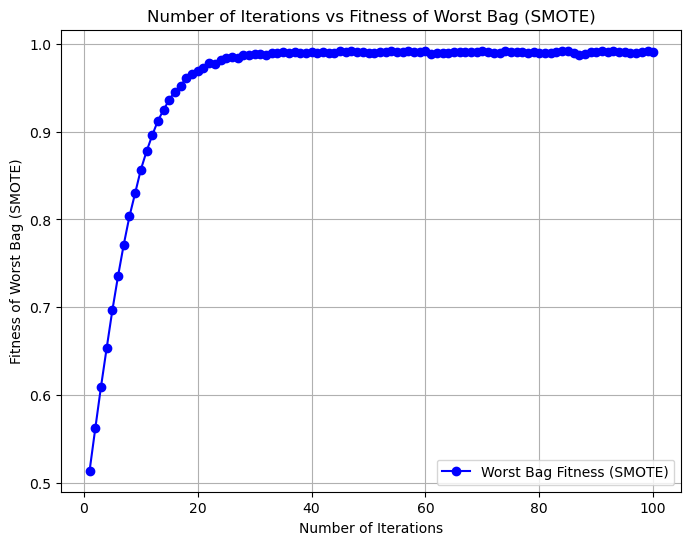

In [47]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Assume you have your data (X, y) loaded and ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling on the training data
smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Combine X and y into a single dataset for SMOTE
data_smote = np.c_[X_resampled_smote, y_resampled_smote]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data_smote) // 2
max_bag_size = len(data_smote)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) % len(data)
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization with SMOTE oversampling to get the optimal bags and tracking lists
optimal_bags_smote, worst_bag_accuracies_smote, worst_bag_diversities_smote, worst_bag_fitnesses_smote = tlbo_optimization(data_smote, classifiers, num_bags, min_bag_size, max_bag_size)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags_smote[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X_resampled_smote[optimal_bag], y_resampled_smote[optimal_bag])
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses_smote, marker='o', color='b', label='Worst Bag Fitness (SMOTE)')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag (SMOTE)')
plt.title('Number of Iterations vs Fitness of Worst Bag (SMOTE)')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
#oversampling with 5 bags 

Iteration 20:
Worst Bag Accuracy: 0.9742647058823529
Worst Bag Diversity (Hamming Distance): 0.0661764705882353
Worst Bag Fitness: 0.9621740490557936

Iteration 40:
Worst Bag Accuracy: 0.9935897435897436
Worst Bag Diversity (Hamming Distance): 0.04487179487179487
Worst Bag Fitness: 0.9860300706459816

Iteration 60:
Worst Bag Accuracy: 0.9755244755244755
Worst Bag Diversity (Hamming Distance): 0.05944055944055944
Worst Bag Fitness: 0.9853536380689248

Iteration 80:
Worst Bag Accuracy: 0.9847328244274809
Worst Bag Diversity (Hamming Distance): 0.0737913486005089
Worst Bag Fitness: 0.9846379121464941

Iteration 100:
Worst Bag Accuracy: 0.9962962962962963
Worst Bag Diversity (Hamming Distance): 0.018518518518518517
Worst Bag Fitness: 0.9869507269317079

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8548387096774194
AUC: 0.7037037037037037
Sensitivity (Recall): 0.9074074074074074
Specificity: 0.5
Precision: 0.9245283018867925
F1 Score: 0.9158878504672898
G-measure: 0.673575314054

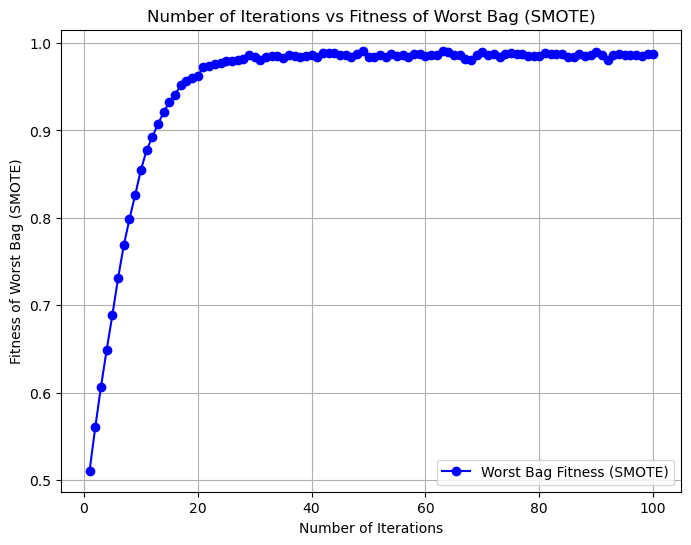

In [37]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Assume you have your data (X, y) loaded and ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling on the training data
smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Combine X and y into a single dataset for SMOTE
data_smote = np.c_[X_resampled_smote, y_resampled_smote]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data_smote) // 2
max_bag_size = len(data_smote)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) % len(data)
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization with SMOTE oversampling to get the optimal bags and tracking lists
optimal_bags_smote, worst_bag_accuracies_smote, worst_bag_diversities_smote, worst_bag_fitnesses_smote = tlbo_optimization(data_smote, classifiers, num_bags, min_bag_size, max_bag_size)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags_smote[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X_resampled_smote[optimal_bag], y_resampled_smote[optimal_bag])
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses_smote, marker='o', color='b', label='Worst Bag Fitness (SMOTE)')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag (SMOTE)')
plt.title('Number of Iterations vs Fitness of Worst Bag (SMOTE)')
plt.legend()
plt.grid(True)
plt.show()


Iteration 20:
Worst Bag Accuracy: 0.9776785714285714
Worst Bag Diversity (Hamming Distance): 0.017857142857142856
Worst Bag Fitness: 0.964888208128579

Iteration 40:
Worst Bag Accuracy: 0.987012987012987
Worst Bag Diversity (Hamming Distance): 0.048701298701298704
Worst Bag Fitness: 0.9871155894597987

Iteration 60:
Worst Bag Accuracy: 0.9976525821596244
Worst Bag Diversity (Hamming Distance): 0.028169014084507043
Worst Bag Fitness: 0.9896146092102509

Iteration 80:
Worst Bag Accuracy: 0.991044776119403
Worst Bag Diversity (Hamming Distance): 0.041791044776119404
Worst Bag Fitness: 0.9882998595064334

Iteration 100:
Worst Bag Accuracy: 0.9787234042553191
Worst Bag Diversity (Hamming Distance): 0.06808510638297872
Worst Bag Fitness: 0.9858357077200214

Evaluation Metrics for Ensemble Predictions with ADASYN:
Accuracy: 0.8225806451612904
AUC: 0.6319444444444444
Sensitivity (Recall): 0.8888888888888888
Specificity: 0.375
Precision: 0.9056603773584906
F1 Score: 0.897196261682243
G-measure:

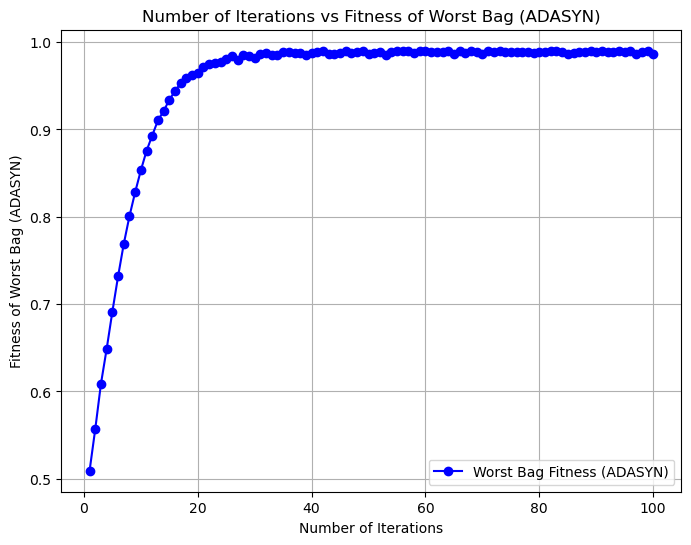

In [38]:
import numpy as np
from imblearn.over_sampling import ADASYN  # Import ADASYN
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Assume you have your data (X, y) loaded and ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN oversampling on the training data
adasyn = ADASYN()
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Combine X and y into a single dataset for ADASYN
data_adasyn = np.c_[X_resampled_adasyn, y_resampled_adasyn]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data_adasyn) // 2
max_bag_size = len(data_adasyn)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) % len(data)
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization with ADASYN oversampling to get the optimal bags and tracking lists
optimal_bags_adasyn, worst_bag_accuracies_adasyn, worst_bag_diversities_adasyn, worst_bag_fitnesses_adasyn = tlbo_optimization(data_adasyn, classifiers, num_bags, min_bag_size, max_bag_size)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags_adasyn[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X_resampled_adasyn[optimal_bag], y_resampled_adasyn[optimal_bag])
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions with ADASYN:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for the number of iterations vs the fitness of the worst bag
num_iterations = 100  # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_bag_fitnesses_adasyn, marker='o', color='b', label='Worst Bag Fitness (ADASYN)')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag (ADASYN)')
plt.title('Number of Iterations vs Fitness of Worst Bag (ADASYN)')
plt.legend()
plt.grid(True)
plt.show()


# Random undersampling 10 bags 

Iteration 20:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Hamming Distance): 0.07462686567164178
Worst Bag Fitness: 0.9607322669785506

Iteration 40:
Worst Bag Accuracy: 0.9506172839506173
Worst Bag Diversity (Hamming Distance): 0.14814814814814814
Worst Bag Fitness: 0.9700701335356067

Iteration 60:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Hamming Distance): 0.02702702702702703
Worst Bag Fitness: 0.9816656188395398

Iteration 80:
Worst Bag Accuracy: 0.9846153846153847
Worst Bag Diversity (Hamming Distance): 0.1076923076923077
Worst Bag Fitness: 0.9666248881390442

Iteration 100:
Worst Bag Accuracy: 0.9818181818181818
Worst Bag Diversity (Hamming Distance): 0.05454545454545454
Worst Bag Fitness: 0.9719299483557794

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9032258064516129
AUC: 0.7847222222222221
Sensitivity (Recall): 0.9444444444444444
Specificity: 0.625
Precision: 0.9444444444444444
F1 Score: 0.9444444444444444
G-measure: 0.768295371441074


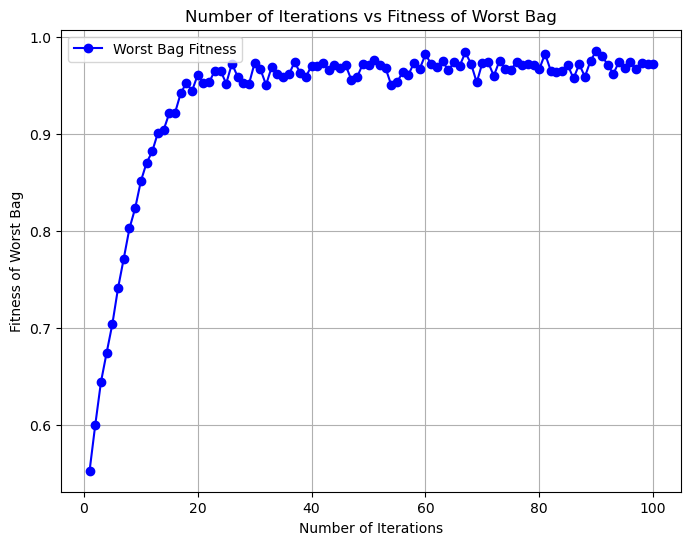

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            # Perform undersampling on the training data
            indices_majority = np.where(y_train_bag == 0)[0]
            indices_minority = np.where(y_train_bag == 1)[0]

            minority_class_ratio = len(indices_minority) / len(y_train_bag)
            undersampler = RandomUnderSampler(sampling_strategy=minority_class_ratio)

            indices_undersampled, _ = undersampler.fit_resample(np.arange(len(y_train_bag)).reshape(-1, 1), y_train_bag)

            X_train_bag = X_train_bag[indices_undersampled.flatten()]
            y_train_bag = y_train_bag[indices_undersampled.flatten()]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# ...

# Define a function for undersampling
def perform_undersampling(X, y):
    # Implement your undersampling technique here
    # You can use libraries like imbalanced-learn or custom logic to perform undersampling
    # For example, you can use RandomUnderSampler from imbalanced-learn:
    indices_majority = np.where(y == 0)[0]
    indices_minority = np.where(y == 1)[0]

    minority_class_ratio = len(indices_minority) / len(y)
    undersampler = RandomUnderSampler(sampling_strategy=minority_class_ratio)

    indices_undersampled, _ = undersampler.fit_resample(np.arange(len(y)).reshape(-1, 1), y)

    X_resampled = X[indices_undersampled.flatten()]
    y_resampled = y[indices_undersampled.flatten()]

    return X_resampled, y_resampled

# ...

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for the number of iterations vs fitness of the worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


# Random undersampling with 5 bags 

Iteration 20:
Worst Bag Accuracy: 0.975609756097561
Worst Bag Diversity (Hamming Distance): 0.14634146341463414
Worst Bag Fitness: 0.9524359269073729

Iteration 40:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Hamming Distance): 0.125
Worst Bag Fitness: 0.9833974285975448

Iteration 60:
Worst Bag Accuracy: 0.9811320754716981
Worst Bag Diversity (Hamming Distance): 0.24528301886792453
Worst Bag Fitness: 0.9730017730839359

Iteration 80:
Worst Bag Accuracy: 0.9387755102040817
Worst Bag Diversity (Hamming Distance): 0.1836734693877551
Worst Bag Fitness: 0.9570565150785312

Iteration 100:
Worst Bag Accuracy: 0.9347826086956522
Worst Bag Diversity (Hamming Distance): 0.2826086956521739
Worst Bag Fitness: 0.946661745609478

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9354838709677419
AUC: 0.8032407407407407
Sensitivity (Recall): 0.9814814814814815
Specificity: 0.625
Precision: 0.9464285714285714
F1 Score: 0.9636363636363636
G-measure: 0.7832151211039825


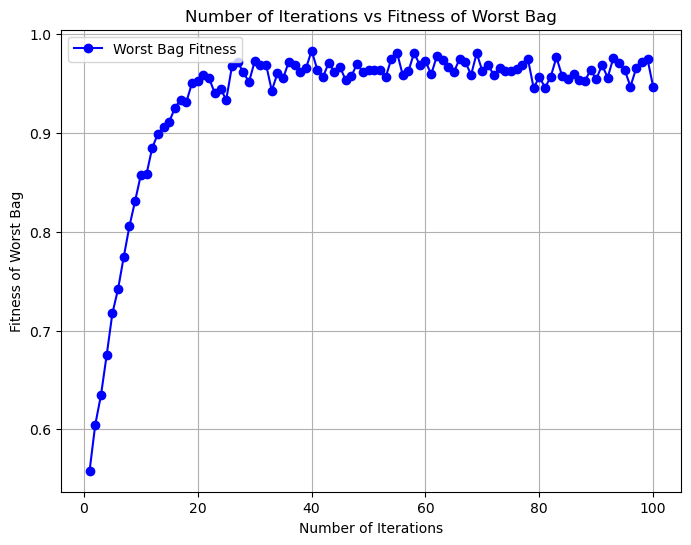

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            # Perform undersampling on the training data
            indices_majority = np.where(y_train_bag == 0)[0]
            indices_minority = np.where(y_train_bag == 1)[0]

            minority_class_ratio = len(indices_minority) / len(y_train_bag)
            undersampler = RandomUnderSampler(sampling_strategy=minority_class_ratio)

            indices_undersampled, _ = undersampler.fit_resample(np.arange(len(y_train_bag)).reshape(-1, 1), y_train_bag)

            X_train_bag = X_train_bag[indices_undersampled.flatten()]
            y_train_bag = y_train_bag[indices_undersampled.flatten()]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# ...

# Define a function for undersampling
def perform_undersampling(X, y):
    # Implement your undersampling technique here
    # You can use libraries like imbalanced-learn or custom logic to perform undersampling
    # For example, you can use RandomUnderSampler from imbalanced-learn:
    indices_majority = np.where(y == 0)[0]
    indices_minority = np.where(y == 1)[0]

    minority_class_ratio = len(indices_minority) / len(y)
    undersampler = RandomUnderSampler(sampling_strategy=minority_class_ratio)

    indices_undersampled, _ = undersampler.fit_resample(np.arange(len(y)).reshape(-1, 1), y)

    X_resampled = X[indices_undersampled.flatten()]
    y_resampled = y[indices_undersampled.flatten()]

    return X_resampled, y_resampled

# ...

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for the number of iterations vs fitness of the worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


Iteration 20:
Worst Bag Accuracy: 0.9728260869565217
Worst Bag Diversity (Hamming Distance): 0.11413043478260869
Worst Bag Fitness: 0.9574076717547426

Iteration 40:
Worst Bag Accuracy: 0.9761904761904762
Worst Bag Diversity (Hamming Distance): 0.0873015873015873
Worst Bag Fitness: 0.9775903032518618

Iteration 60:
Worst Bag Accuracy: 0.9724409448818898
Worst Bag Diversity (Hamming Distance): 0.07480314960629922
Worst Bag Fitness: 0.9775661421859618

Iteration 80:
Worst Bag Accuracy: 0.9947089947089947
Worst Bag Diversity (Hamming Distance): 0.031746031746031744
Worst Bag Fitness: 0.9793384197294839

Iteration 100:
Worst Bag Accuracy: 0.9832214765100671
Worst Bag Diversity (Hamming Distance): 0.0738255033557047
Worst Bag Fitness: 0.9781897826026874

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9516129032258065
AUC: 0.8125
Sensitivity (Recall): 1.0
Specificity: 0.625
Precision: 0.9473684210526315
F1 Score: 0.972972972972973
G-measure: 0.7905694150420949


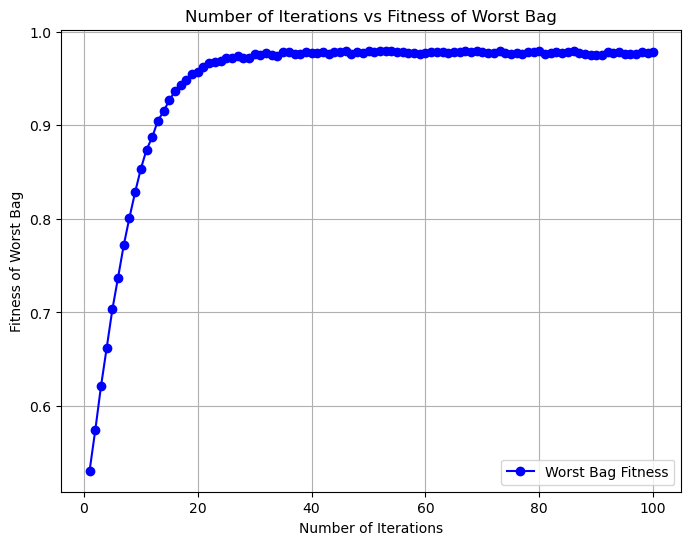

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


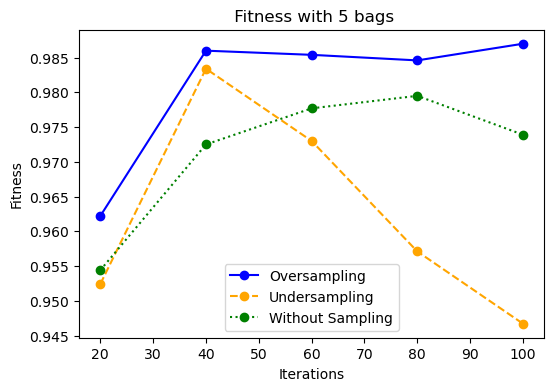

In [66]:
import matplotlib.pyplot as plt

# Data for oversampling with 5 bags
oversampling_iterations = [20, 40, 60, 80, 100]
oversampling_fitness = [0.9622, 0.9860, 0.9854, 0.9846, 0.9870]

# Data for undersampling with 5 bags
undersampling_fitness = [0.9524, 0.9834, 0.9730, 0.9571, 0.9467]

# Data for without sampling with 5 bags
without_sampling_fitness = [0.9544, 0.9725, 0.9777, 0.9795, 0.9739]

# Setting figure size
plt.figure(figsize=(6, 4))

# Plotting the lines with different colors and styles
plt.plot(oversampling_iterations, oversampling_fitness, marker='o', linestyle='-', color='blue', label='Oversampling')
plt.plot(oversampling_iterations, undersampling_fitness, marker='o', linestyle='--', color='orange', label='Undersampling')
plt.plot(oversampling_iterations, without_sampling_fitness, marker='o', linestyle=':', color='green', label='Without Sampling')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title(' Fitness with 5 bags')
plt.legend()

# Display the plot
plt.show()


In [41]:
# WITH 5 BAGS 

Iteration 20:
Worst Bag Accuracy: 0.9679715302491103
Worst Bag Diversity (Hamming Distance): 0.05693950177935943
Worst Bag Fitness: 0.9544382031927542

Iteration 40:
Worst Bag Accuracy: 0.9630996309963099
Worst Bag Diversity (Hamming Distance): 0.11439114391143912
Worst Bag Fitness: 0.9725434633668991

Iteration 60:
Worst Bag Accuracy: 0.987012987012987
Worst Bag Diversity (Hamming Distance): 0.05844155844155844
Worst Bag Fitness: 0.9776734406494232

Iteration 80:
Worst Bag Accuracy: 0.996268656716418
Worst Bag Diversity (Hamming Distance): 0.05223880597014925
Worst Bag Fitness: 0.979530984110897

Iteration 100:
Worst Bag Accuracy: 0.9681528662420382
Worst Bag Diversity (Hamming Distance): 0.08917197452229299
Worst Bag Fitness: 0.9739079425773587

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8870967741935484
AUC: 0.775462962962963
Sensitivity (Recall): 0.9259259259259259
Specificity: 0.625
Precision: 0.9433962264150944
F1 Score: 0.9345794392523364
G-measure: 0.7607257743127

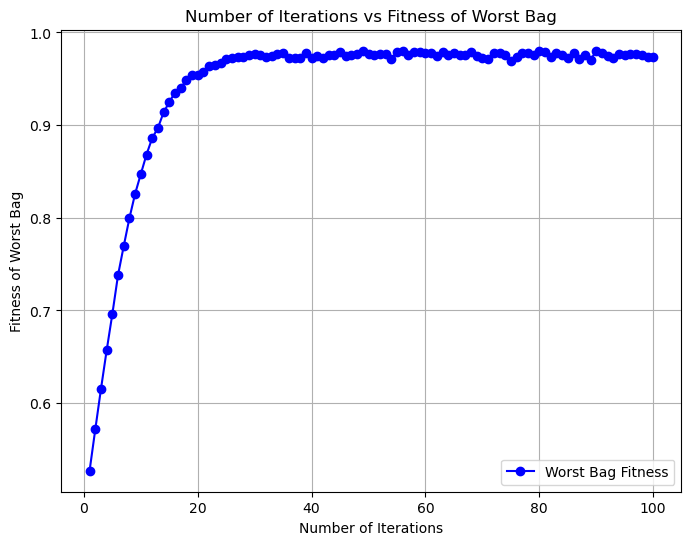

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# WITH RESPECT TO BEST BAG (10 BAGS) MODIFICATIONS 

Iteration 20:
Best Bag Accuracy: 0.9808612440191388
Best Bag Diversity (Hamming Distance): 0.10047846889952153
Best Bag Fitness: 0.9619603297145212

Iteration 40:
Best Bag Accuracy: 0.981549815498155
Best Bag Diversity (Hamming Distance): 0.04797047970479705
Best Bag Fitness: 0.9803350757801225

Iteration 60:
Best Bag Accuracy: 0.9924242424242424
Best Bag Diversity (Hamming Distance): 0.05303030303030303
Best Bag Fitness: 0.982704420950801

Iteration 80:
Best Bag Accuracy: 0.9813084112149533
Best Bag Diversity (Hamming Distance): 0.08878504672897196
Best Bag Fitness: 0.9820559300266162

Iteration 100:
Best Bag Accuracy: 0.9796747967479674
Best Bag Diversity (Hamming Distance): 0.04878048780487805
Best Bag Fitness: 0.9814360633647345

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9032258064516129
AUC: 0.7314814814814814
Sensitivity (Recall): 0.9629629629629629
Specificity: 0.5
Precision: 0.9285714285714286
F1 Score: 0.9454545454545454
G-measure: 0.693888666488711


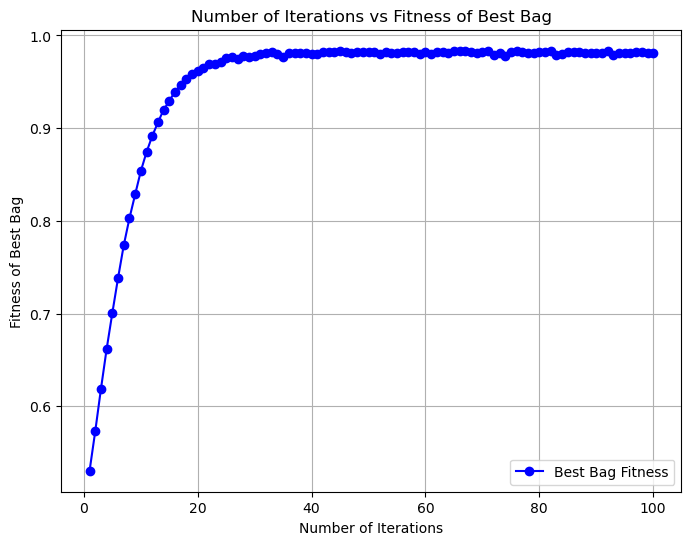

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]
# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Hamming Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
#bestbag  fitness (5 bags) 

Iteration 20:
Best Bag Accuracy: 0.9782608695652174
Best Bag Diversity (Hamming Distance): 0.09239130434782608
Best Bag Fitness: 0.9615984945092326

Iteration 40:
Best Bag Accuracy: 0.9738805970149254
Best Bag Diversity (Hamming Distance): 0.08208955223880597
Best Bag Fitness: 0.9796706722338376

Iteration 60:
Best Bag Accuracy: 0.9841269841269841
Best Bag Diversity (Hamming Distance): 0.05291005291005291
Best Bag Fitness: 0.9820703510574755

Iteration 80:
Best Bag Accuracy: 0.9627329192546584
Best Bag Diversity (Hamming Distance): 0.13043478260869565
Best Bag Fitness: 0.9777979323798277

Iteration 100:
Best Bag Accuracy: 0.9671532846715328
Best Bag Diversity (Hamming Distance): 0.11313868613138686
Best Bag Fitness: 0.9786821184299844

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9193548387096774
AUC: 0.7407407407407407
Sensitivity (Recall): 0.9814814814814815
Specificity: 0.5
Precision: 0.9298245614035088
F1 Score: 0.954954954954955
G-measure: 0.700528900717694


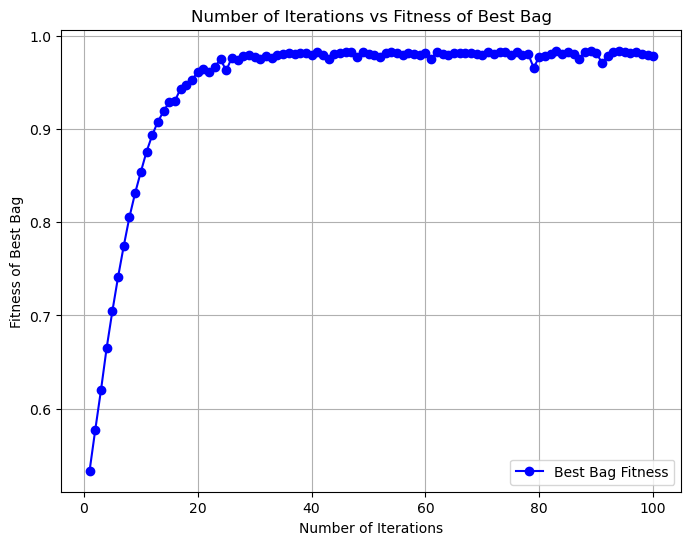

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]
# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Hamming Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
#Euclidean distance as diversity 

Iteration 20:
Worst Bag Accuracy: 0.9487179487179487
Worst Bag Diversity (Euclidean Distance): 0.024549413019393285
Worst Bag Fitness: 0.9514170832656514

Iteration 40:
Worst Bag Accuracy: 0.9794520547945206
Worst Bag Diversity (Euclidean Distance): 0.01677732700536423
Worst Bag Fitness: 0.975822846813536

Iteration 60:
Worst Bag Accuracy: 0.9607142857142857
Worst Bag Diversity (Euclidean Distance): 0.021128856368212916
Worst Bag Fitness: 0.9748565722754673

Iteration 80:
Worst Bag Accuracy: 0.9470899470899471
Worst Bag Diversity (Euclidean Distance): 0.02799736837105387
Worst Bag Fitness: 0.9735008971331097

Iteration 100:
Worst Bag Accuracy: 0.9892857142857143
Worst Bag Diversity (Euclidean Distance): 0.012371791482634837
Worst Bag Fitness: 0.9777205957136582

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.967741935483871
AUC: 0.875
Sensitivity (Recall): 1.0
Specificity: 0.75
Precision: 0.9642857142857143
F1 Score: 0.9818181818181818
G-measure: 0.8660254037844386


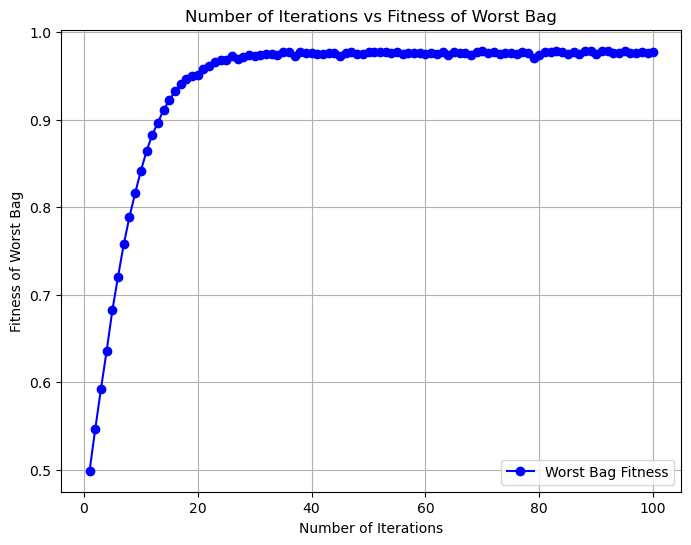

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Euclidean distance between classifiers' predictions
            diversity = np.linalg.norm(ensemble_preds[:, 1:] - ensemble_preds[:, :-1], ord='fro') / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Euclidean Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
# Eucleadian distance as diversity measure with 5 bags 

Iteration 20:
Worst Bag Accuracy: 0.979933110367893
Worst Bag Diversity (Euclidean Distance): 0.014578257336256435
Worst Bag Fitness: 0.9509408888001971

Iteration 40:
Worst Bag Accuracy: 0.9457627118644067
Worst Bag Diversity (Euclidean Distance): 0.0219686125369758
Worst Bag Fitness: 0.9642987364032518

Iteration 60:
Worst Bag Accuracy: 0.9810126582278481
Worst Bag Diversity (Euclidean Distance): 0.021924693766694647
Worst Bag Fitness: 0.9717183143145683

Iteration 80:
Worst Bag Accuracy: 0.9768211920529801
Worst Bag Diversity (Euclidean Distance): 0.016221786376047535
Worst Bag Fitness: 0.9708867536792102

Iteration 100:
Worst Bag Accuracy: 0.9807692307692307
Worst Bag Diversity (Euclidean Distance): 0.022205779584216375
Worst Bag Fitness: 0.9716764831325161

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8870967741935484
AUC: 0.6689814814814814
Sensitivity (Recall): 0.9629629629629629
Specificity: 0.375
Precision: 0.9122807017543859
F1 Score: 0.9369369369369369
G-measure:

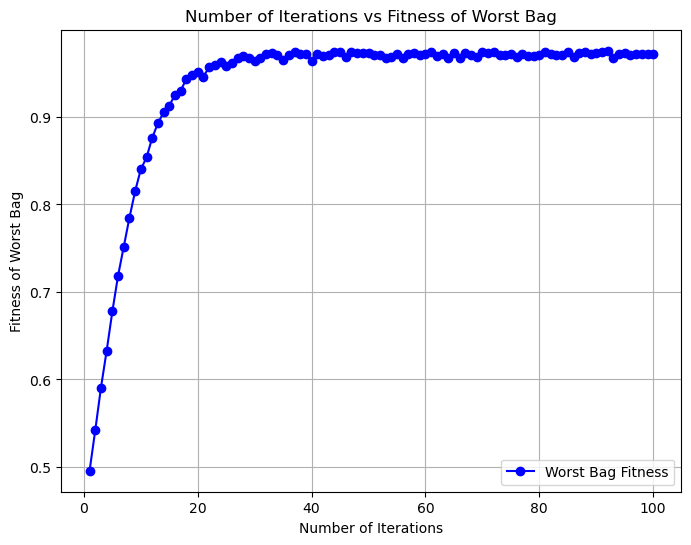

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Euclidean distance between classifiers' predictions
            diversity = np.linalg.norm(ensemble_preds[:, 1:] - ensemble_preds[:, :-1], ord='fro') / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Euclidean Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
#best bag modification using TLBO (10 bags)

Iteration 20:
Best Bag Accuracy: 0.9932885906040269
Best Bag Diversity (Euclidean Distance): 0.015377770788442416
Best Bag Fitness: 0.9721557521322046

Iteration 40:
Best Bag Accuracy: 0.993421052631579
Best Bag Diversity (Euclidean Distance): 0.012740076796734924
Best Bag Fitness: 0.9930297636842429

Iteration 60:
Best Bag Accuracy: 1.0
Best Bag Diversity (Euclidean Distance): 0.009457489354375204
Best Bag Fitness: 0.9999928548784943

Iteration 80:
Best Bag Accuracy: 1.0
Best Bag Diversity (Euclidean Distance): 0.02593148192212365
Best Bag Fitness: 0.9999998730228519

Iteration 100:
Best Bag Accuracy: 0.9898305084745763
Best Bag Diversity (Euclidean Distance): 0.013128757105787854
Best Bag Fitness: 0.9898305061736931

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8709677419354839
AUC: 0.6597222222222222
Sensitivity (Recall): 0.9444444444444444
Specificity: 0.375
Precision: 0.9107142857142857
F1 Score: 0.9272727272727271
G-measure: 0.5951190357119042


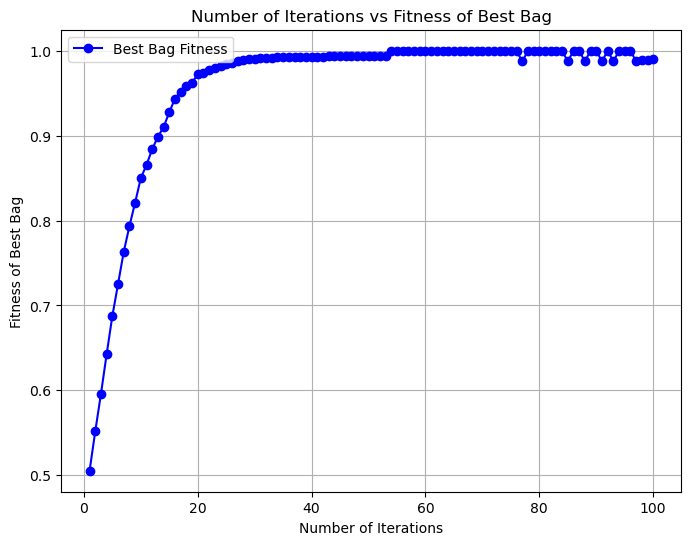

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# ... (previous code remains unchanged)

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Euclidean distance between classifiers' predictions
            diversity = np.linalg.norm(ensemble_preds[:, 1:] - ensemble_preds[:, :-1], ord='fro') / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitnesses)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitnesses[best_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = np.linalg.norm(ensemble_preds_new_bag[:, 1:] - ensemble_preds_new_bag[:, :-1], ord='fro') / ensemble_preds_new_bag.shape[0]
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[best_bag_index]:
            bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Euclidean Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitnesses[best_bag_index]}")
            
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)
# Rest of the code for evaluation and plotting


# Rest of the code for evaluation and plotting

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
#Diversity measure as Euclidian distance (5 bags)

Iteration 20:
Best Bag Accuracy: 0.9865319865319865
Best Bag Diversity (Euclidean Distance): 0.01259817301944088
Best Bag Fitness: 0.9654850919214044

Iteration 40:
Best Bag Accuracy: 0.9940476190476191
Best Bag Diversity (Euclidean Distance): 0.015748519708717802
Best Bag Fitness: 0.9936572804622964

Iteration 60:
Best Bag Accuracy: 0.9940476190476191
Best Bag Diversity (Euclidean Distance): 0.015748519708717802
Best Bag Fitness: 0.9940405622420216

Iteration 80:
Best Bag Accuracy: 0.9940476190476191
Best Bag Diversity (Euclidean Distance): 0.015748519708717802
Best Bag Fitness: 0.9940474915189829

Iteration 100:
Best Bag Accuracy: 0.9945945945945946
Best Bag Diversity (Euclidean Distance): 0.014301358438186976
Best Bag Fitness: 0.9945945922852508

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8870967741935484
AUC: 0.6689814814814814
Sensitivity (Recall): 0.9629629629629629
Specificity: 0.375
Precision: 0.9122807017543859
F1 Score: 0.9369369369369369
G-measure: 0.6009252125

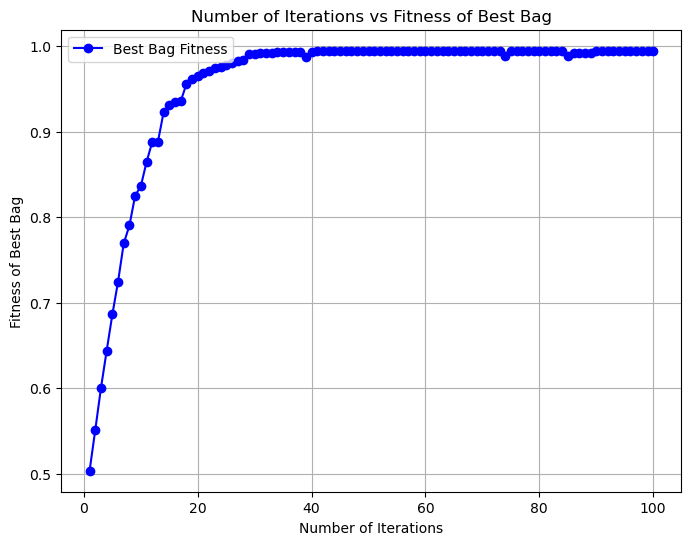

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# ... (previous code remains unchanged)

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Euclidean distance between classifiers' predictions
            diversity = np.linalg.norm(ensemble_preds[:, 1:] - ensemble_preds[:, :-1], ord='fro') / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitnesses)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitnesses[best_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = np.linalg.norm(ensemble_preds_new_bag[:, 1:] - ensemble_preds_new_bag[:, :-1], ord='fro') / ensemble_preds_new_bag.shape[0]
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[best_bag_index]:
            bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Euclidean Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitnesses[best_bag_index]}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)
# Rest of the code for evaluation and plotting


# Rest of the code for evaluation and plotting

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
# diversity measure bhattacharyya_distance (10 bags)

Iteration 20:
Best Bag Accuracy: 0.9901315789473685
Best Bag Diversity (Bhattacharyya Distance): 0.2087937531531578
Best Bag Fitness: 0.973246720195578

Iteration 40:
Best Bag Accuracy: 0.9957081545064378
Best Bag Diversity (Bhattacharyya Distance): 0.13433038778917591
Best Bag Fitness: 0.9953644672035301

Iteration 60:
Best Bag Accuracy: 1.0
Best Bag Diversity (Bhattacharyya Distance): 0.40796154322271444
Best Bag Fitness: 0.9999957294243668

Iteration 80:
Best Bag Accuracy: 1.0
Best Bag Diversity (Bhattacharyya Distance): 0.40796154322271444
Best Bag Fitness: 0.99999992282334

Iteration 100:
Best Bag Accuracy: 1.0
Best Bag Diversity (Bhattacharyya Distance): 0.14446019903301113
Best Bag Fitness: 0.9999999979845463

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8870967741935484
AUC: 0.6689814814814814
Sensitivity (Recall): 0.9629629629629629
Specificity: 0.375
Precision: 0.9122807017543859
F1 Score: 0.9369369369369369
G-measure: 0.6009252125773316


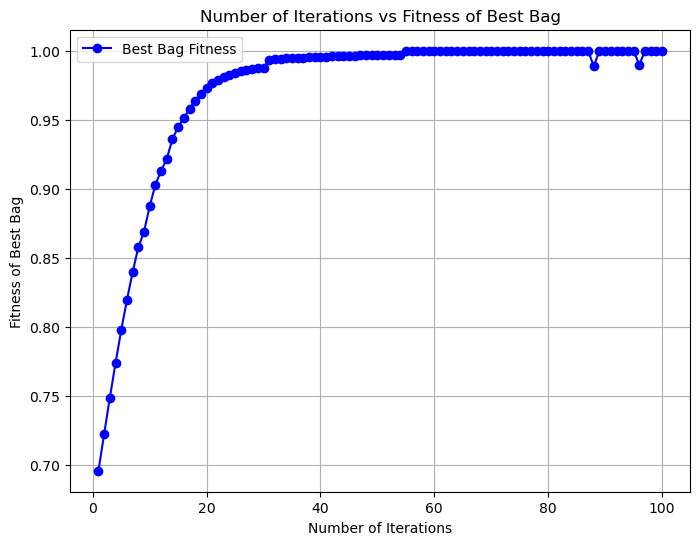

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle



# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitnesses)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitnesses[best_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = bhattacharyya_distance(ensemble_preds_new_bag[:, 1:], ensemble_preds_new_bag[:, :-1])
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[best_bag_index]:
            bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Bhattacharyya Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitnesses[best_bag_index]}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Use the optimized ensemble to make predictions on the testing data
# ... (previous code remains unchanged)

# Calculate evaluation metrics for the ensemble predictions
# ... (previous code remains unchanged)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
# with 5 bags bhattacharya diversity measure 

Iteration 20:
Best Bag Accuracy: 0.9874213836477987
Best Bag Diversity (Bhattacharyya Distance): 0.4804858122341106
Best Bag Fitness: 0.9764664097082256

Iteration 40:
Best Bag Accuracy: 1.0
Best Bag Diversity (Bhattacharyya Distance): 1.0
Best Bag Fitness: 1.0

Iteration 60:
Best Bag Accuracy: 1.0
Best Bag Diversity (Bhattacharyya Distance): 1.0
Best Bag Fitness: 1.0

Iteration 80:
Best Bag Accuracy: 1.0
Best Bag Diversity (Bhattacharyya Distance): 1.0
Best Bag Fitness: 1.0

Iteration 100:
Best Bag Accuracy: 1.0
Best Bag Diversity (Bhattacharyya Distance): 1.0
Best Bag Fitness: 1.0

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8870967741935484
AUC: 0.6689814814814814
Sensitivity (Recall): 0.9629629629629629
Specificity: 0.375
Precision: 0.9122807017543859
F1 Score: 0.9369369369369369
G-measure: 0.6009252125773316


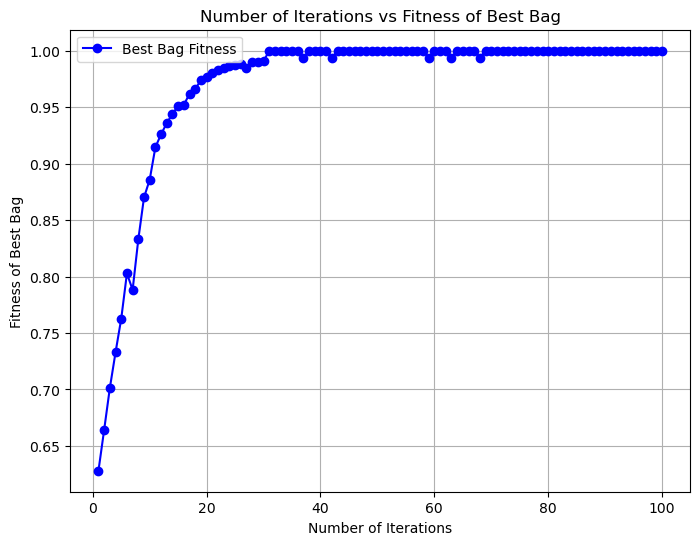

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle



# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitnesses)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitnesses[best_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = bhattacharyya_distance(ensemble_preds_new_bag[:, 1:], ensemble_preds_new_bag[:, :-1])
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[best_bag_index]:
            bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Bhattacharyya Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitnesses[best_bag_index]}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Use the optimized ensemble to make predictions on the testing data
# ... (previous code remains unchanged)

# Calculate evaluation metrics for the ensemble predictions
# ... (previous code remains unchanged)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#worstbag bhattacharya distance (10 bags)

Iteration 20:
Worst Bag Accuracy: 0.9826989619377162
Worst Bag Diversity (Bhattacharyya Distance): 0.06967262807334121
Worst Bag Fitness: 0.9629682895255688

Iteration 40:
Worst Bag Accuracy: 0.9835390946502057
Worst Bag Diversity (Bhattacharyya Distance): 0.12965956647868113
Worst Bag Fitness: 0.9831983991233595

Iteration 60:
Worst Bag Accuracy: 0.986159169550173
Worst Bag Diversity (Bhattacharyya Distance): 0.17035950783357942
Worst Bag Fitness: 0.98615328490853

Iteration 80:
Worst Bag Accuracy: 0.9891891891891892
Worst Bag Diversity (Bhattacharyya Distance): 0.4059901452507447
Worst Bag Fitness: 0.9891891131648131

Iteration 100:
Worst Bag Accuracy: 0.990909090909091
Worst Bag Diversity (Bhattacharyya Distance): 0.2837596990004761
Worst Bag Fitness: 0.9909090892432108

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8870967741935484
AUC: 0.6689814814814814
Sensitivity (Recall): 0.9629629629629629
Specificity: 0.375
Precision: 0.9122807017543859
F1 Score: 0.936936936936936

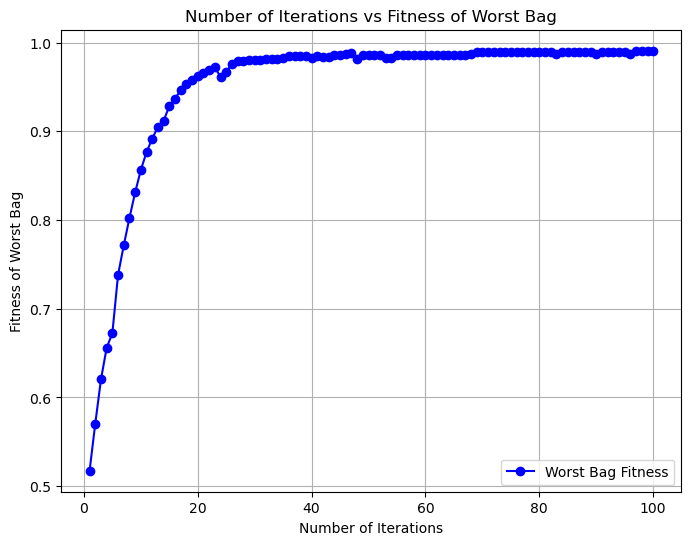

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitnesses)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(worst_bag_accuracy)
        best_bag_diversities.append(worst_bag_diversity)
        best_bag_fitnesses.append(fitnesses[worst_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = bhattacharyya_distance(ensemble_preds_new_bag[:, 1:], ensemble_preds_new_bag[:, :-1])
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[worst_bag_index]:
            bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitnesses[worst_bag_index]}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Use the optimized ensemble to make predictions on the testing data
# ... (previous code remains unchanged)

# Calculate evaluation metrics for the ensemble predictions
# ... (previous code remains unchanged)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
#with bhattachrya measure (5 bags worst bags)

Iteration 20:
Worst Bag Accuracy: 0.9864864864864865
Worst Bag Diversity (Bhattacharyya Distance): 0.13768641107235413
Worst Bag Fitness: 0.9681437557127539

Iteration 40:
Worst Bag Accuracy: 0.98989898989899
Worst Bag Diversity (Bhattacharyya Distance): 0.05119781257522948
Worst Bag Fitness: 0.9895244507730265

Iteration 60:
Worst Bag Accuracy: 0.9940476190476191
Worst Bag Diversity (Bhattacharyya Distance): 0.5839635470238824
Worst Bag Fitness: 0.99404466097112

Iteration 80:
Worst Bag Accuracy: 0.9941860465116279
Worst Bag Diversity (Bhattacharyya Distance): 0.3292251898550184
Worst Bag Fitness: 0.9941859598289854

Iteration 100:
Worst Bag Accuracy: 0.9949238578680203
Worst Bag Diversity (Bhattacharyya Distance): 0.13059932243405456
Worst Bag Fitness: 0.9949238558318718

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8870967741935484
AUC: 0.6689814814814814
Sensitivity (Recall): 0.9629629629629629
Specificity: 0.375
Precision: 0.9122807017543859
F1 Score: 0.936936936936936

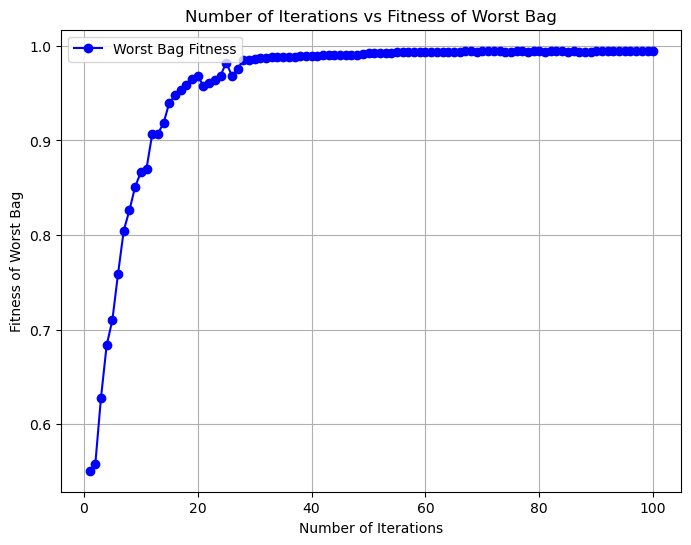

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitnesses)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(worst_bag_accuracy)
        best_bag_diversities.append(worst_bag_diversity)
        best_bag_fitnesses.append(fitnesses[worst_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = bhattacharyya_distance(ensemble_preds_new_bag[:, 1:], ensemble_preds_new_bag[:, :-1])
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[worst_bag_index]:
            bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitnesses[worst_bag_index]}")
            
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()
